# Hospitalization EDA & Wrangling

This notebook focuses in the exploratory data analysis of the hospitalization features.

**Findings and Accomplishments:**

* Wrangled and cleaned hospitalization features: (1) declared categorical variables as categorical, and consistently recoded. 

* 

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from matplotlib.pyplot import rcParams
from scipy import stats

**Set Matplot Lib & Seaborn Styles** 

In [2]:
#Set Graphs style

rcParams['figure.figsize'] = 12, 12

rcParams['font.size'] = 12

sns.set(style='darkgrid')

sns.set_style({"xtick.major.size": 8, "ytick.major.size": 8})

sns.set_context("talk", font_scale=1.5)

## Upload Random Sampled Data

Upload hospitalization columns from the random sample created from the AIH 2015 - 2018 files.

In [3]:
%%time

AIH_sample_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 2_Deep_Learning/Data/Random Sample File/AIH_random_sample_full.csv')

AIH_sample_path2 = ('/Users/itapia/Documents/Springboard/Capstone 2_Deep_Learning/Data/Random Sample File/AIH_random_sample_full.csv')


# Patient hospitalization columns 

hospi = ['ANO_CMPT','MES_CMPT','CGC_HOSP',
        'UTI_MES_TO','MARCA_UTI','UTI_INT_TO',
        'DIAR_ACOM','QT_DIARIAS','PROC_SOLIC',
        'PROC_REA','DT_INTER','DT_SAIDA','COBRANCA',
        'IND_VDRL','DIAS_PERM','CONTRACEP1','CONTRACEP2',
        'INSC_PN','CID_ASSO','CID_MORTE','COMPLEX',
        'MARCA_UCI','ESPEC','CAR_INT']


hospi_data = pd.read_csv(AIH_sample_path, 
                        encoding = 'UTF-8', 
                        na_values= ['NaN',' ',''],
                        usecols = hospi)

<string>:2: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 1min 42s, sys: 17.8 s, total: 2min
Wall time: 2min 1s


In [4]:
hospi_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16614830 entries, 0 to 16614829
Data columns (total 24 columns):
ANO_CMPT      16614830 non-null int64
MES_CMPT      16614830 non-null int64
ESPEC         16614830 non-null int64
CGC_HOSP      12629682 non-null float64
UTI_MES_TO    16614830 non-null int64
MARCA_UTI     16614830 non-null int64
UTI_INT_TO    16614830 non-null int64
DIAR_ACOM     16614830 non-null int64
QT_DIARIAS    16614830 non-null int64
PROC_SOLIC    16614830 non-null int64
PROC_REA      16614830 non-null int64
DT_INTER      16614830 non-null int64
DT_SAIDA      16614830 non-null int64
COBRANCA      16614830 non-null int64
IND_VDRL      16614830 non-null int64
DIAS_PERM     16614830 non-null int64
CAR_INT       16614830 non-null int64
CONTRACEP1    16614830 non-null int64
CONTRACEP2    16614830 non-null int64
INSC_PN       16614830 non-null int64
CID_ASSO      16614830 non-null int64
CID_MORTE     16614830 non-null int64
COMPLEX       16614830 non-null int64
MARCA_UCI

Apparently, all complete, except CGC_HOSP (i.e. hospital id)

## Hospitalization Data Bloc Initial Exploration

**Hospitalization Data Descriptive Statistics**

In [5]:
hospi_data.describe()

ANO_CMPT      MES_CMPT         ESPEC      CGC_HOSP    UTI_MES_TO  \
count  1.661483e+07  1.661483e+07  1.661483e+07  1.262968e+07  1.661483e+07   
mean   2.016326e+03  6.101982e+00  2.857979e+00  3.574231e+13  4.613846e-01   
std    1.052621e+00  3.348307e+00  3.449547e+00  2.887393e+13  2.893281e+00   
min    2.015000e+03  1.000000e+00  1.000000e+00  2.982700e+10  0.000000e+00   
25%    2.015000e+03  3.000000e+00  1.000000e+00  1.057205e+13  0.000000e+00   
50%    2.016000e+03  6.000000e+00  3.000000e+00  2.708061e+13  0.000000e+00   
75%    2.017000e+03  9.000000e+00  3.000000e+00  5.598978e+13  0.000000e+00   
max    2.018000e+03  1.200000e+01  8.700000e+01  9.871488e+13  3.020000e+02   

          MARCA_UTI    UTI_INT_TO     DIAR_ACOM    QT_DIARIAS    PROC_SOLIC  \
count  1.661483e+07  1.661483e+07  1.661483e+07  1.661483e+07  1.661483e+07   
mean   4.841298e+00  4.942368e-02  1.945878e+00  4.959391e+00  3.453976e+08   
std    1.863319e+01  9.259680e-01  4.384568e+00  7.258404e+00  5.268186e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.010100e+08   
25%    0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00  3.031000e+08   
50%    0.000000e+00  0.000000e+00  0.000000e+00  3.000000e+00  3.080100e+08   
75%    0.000000e+00  0.000000e+00  2.000000e+00  5.000000e+00  4.080204e+08   
max    9.900000e+01  2.280000e+02  3.400000e+02  3.650000e+02  5.060201e+08   

           ...           COBRANCA      IND_VDRL     DIAS_PERM       CAR_INT  \
count      ...       1.661483e+07  1.661483e+07  1.661483e+07  1.661483e+07   
mean       ...       2.321465e+01  1.570738e-01  5.392590e+00  1.829566e+00   
std        ...       1.859342e+01  3.638704e-01  8.022709e+00  5.443274e-01   
min        ...       1.100000e+01  0.000000e+00  0.000000e+00  1.000000e+00   
25%        ...       1.200000e+01  0.000000e+00  2.000000e+00  2.000000e+00   
50%        ...       1.200000e+01  0.000000e+00  3.000000e+00  2.000000e+00   
75%        ...       2.700000e+01  0.000000e+00  6.000000e+00  2.000000e+00   
max        ...       6.700000e+01  1.000000e+00  3.640000e+02  6.000000e+00   

         CONTRACEP1    CONTRACEP2       INSC_PN    CID_ASSO   CID_MORTE  \
count  1.661483e+07  1.661483e+07  1.661483e+07  16614830.0  16614830.0   
mean   7.057767e-02  4.647529e-02  5.644653e+09         0.0         0.0   
std    7.965424e-01  6.586532e-01  3.757986e+10         0.0         0.0   
min    0.000000e+00  0.000000e+00  0.000000e+00         0.0         0.0   
25%    0.000000e+00  0.000000e+00  0.000000e+00         0.0         0.0   
50%    0.000000e+00  0.000000e+00  0.000000e+00         0.0         0.0   
75%    0.000000e+00  0.000000e+00  0.000000e+00         0.0         0.0   
max    1.200000e+01  1.200000e+01  1.000000e+12         0.0         0.0   

            COMPLEX  
count  1.661483e+07  
mean   2.070164e+00  
std    2.554226e-01  
min    2.000000e+00  
25%    2.000000e+00  
50%    2.000000e+00  
75%    2.000000e+00  
max    3.000000e+00  

[8 rows x 23 columns]

**Findings from Descriptive Statistics & Variable Explanation:**

+ **ESPEC:** Marker for specialty (type) of bed. Mean is 2.85. Max is 87, this is likely a mistake since according to the codebook this variable should go from 1 to 9.
+ **CGC_HOSP:** Id of the hospital. 
+ **UTI_MES_TO:** Number of intensive care unit days in a month. Mean is 0.461 days. Max is 302. 75th percentile is 0. 
+ **UTI_INT_TO:** Number of nights on a intermediary unit. Mean is 0.0494 nights. Max is 228 nights.
+ **DIAR_ACOM:** Number of companion nights. Mean is 1.94 nights. With 75% being at 2 nights. Max is 340. 
+ **QT_DIARIAS:** Number of nights. Mean is 4.95. 75th percentile is 5 nights. Max is 365.
+ **PROC_SOLIC:** Procedure requested code.
+ **PROC_REA:** Procedure performed code.
+ **COBRANCA:** Reason for exit/stay. 
+ **IND_VDRL:** VDRL exam indicator.
+ **DIAS_PERM:** Days of stay. Max is 364. 
+ **CAR_INT:** Character of hospitalization code.
+ **CONTRACEP1 & CONTRACEP2:** Contraception used codes. 
+ **INSC_PN:** Number of pregnant women in pre-natal care. 75th percentile is 0, Max is 1e+12 and mean is 5.64e+09. This variable looks off. 
+ **CID_ASSO:** CID_10 code of cause. This column is empty
+ **CID_MORTE:** CID code of death cause. This column is empty.
+ **COMPLEX:** complexity code.
+ **MARCA_UCI:** Type of intensive care unit used by the patient.
+ **DT_SAIDA:** Exit Date
+ **DT_INTER:** Entry Date.

## Hospitalization Data Wrangling

**Drop empty, redudant & suspect columns.** *Replace zeroes with np.nan where zeroes stand for empty and do not provide information.*

In [6]:
#Drop empty, nearly empty, redundant or suspect columns: 

drop_cols = ['DT_INTER', 'DT_SAIDA','INSC_PN','CID_ASSO','CID_MORTE','QT_DIARIAS']

hospi_data.drop(labels=drop_cols, axis=1, inplace = True)

**Create a new column with especialty of bed values to aid interpretation.**

In [7]:
# Especialty of the bed
# Create dictionary with categories

espec = {1:'Clínica cirúrgica', 2:'Obstetrícia', 3:'Clínica médica', 
         4:'Cuidados prolongados (crônicos)',5:'Psiquiatria', 
         6:'Pneumologia sanitária (tisiologia)',
         7:'Pediatria', 8:'Reabilitação',9:'Clínica cirúrgica - hospital-dia',
        10:'Aids - hospital-dia',11:'Fibrose cística - hospital-dia',
        12:'Intercorrência pós-transplante - hospital-dia',13:'Geriatria - hospital-dia',
        14:'Saúde mental - hospital-dia', 87:'Saúde mental - clínico', 0:np.nan}

# Map dictionary to a new column

hospi_data['espec_name'] = [espec[item] for item in hospi_data.ESPEC]

**Create a new column with character of hospitalization values to aid interpretation.**

In [8]:
# Character of hospitalization
# Create dictionary with categories

car_int = {1:'elective', 2: 'urgent',3:'on-site work accident',
           4:'accident way to work',5:'transit accident',
           6:'lessions or poisoning', 0:np.nan}

# Map dictionary to a new column

hospi_data['car_int_name'] = [car_int[item] for item in hospi_data.CAR_INT]

**Create a new column with complexity values to aid interpretation.**

In [9]:
# Complexity
# Create dictionary with categories

cpx = {1:'basic attention', 2: 'medium complexity', 3:'high complexity', 0: np.nan}

# Map dictionary to a new column

hospi_data['complex_name'] = [cpx[item] for item in hospi_data.COMPLEX]

**Upload reasons for stay or exit codebook. Merge codebook with hospitalization dataset.**

The purpose of this merge is to gain more insight into the diagnosis data and aid interpretation of reasons for stay or exit codes.

In [10]:
#Reasons for stay/exit
#Upload reference codebook

cobranca_ref_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 2_Deep_Learning/References/cobranca_codebook.csv')

cobranca_ref = pd.read_csv(cobranca_ref_path)

hospi_data = pd.merge(hospi_data, cobranca_ref, 
                      how = 'left', left_on = 'COBRANCA', 
                      right_on = 'cobranca_code')

In [11]:
# See merge results.

hospi_data.head()

ANO_CMPT  MES_CMPT  ESPEC      CGC_HOSP  UTI_MES_TO  MARCA_UTI  UTI_INT_TO  \
0      2015         8      3  6.092217e+13           0          0           0   
1      2015         8      7  3.947000e+11           0          0           0   
2      2015        10      2  6.097574e+13           0          0           0   
3      2015         3      1  4.938437e+12           0          0           0   
4      2015        12      1  1.984393e+13           0          0           0   

   DIAR_ACOM  PROC_SOLIC   PROC_REA  \
0          2   303100044  303100044   
1          3   303160047  303160047   
2          2   310010039  310010039   
3          3   408020423  408020423   
4          0   401020029  401020029   

                         ...                          CONTRACEP1  CONTRACEP2  \
0                        ...                                   0           0   
1                        ...                                   0           0   
2                        ...                                   0           0   
3                        ...                                   0           0   
4                        ...                                   0           0   

   COMPLEX  MARCA_UCI         espec_name  car_int_name       complex_name  \
0        2          0     Clínica médica        urgent  medium complexity   
1        2        0.0          Pediatria        urgent  medium complexity   
2        2          0        Obstetrícia        urgent  medium complexity   
3        2          0  Clínica cirúrgica        urgent  medium complexity   
4        2         00  Clínica cirúrgica        urgent  medium complexity   

           cobranca_group cobranca_code  \
0                Released          12.0   
1                Released          12.0   
2  Released to Recuperate          61.0   
3                Released          12.0   
4                Released          27.0   

                                       cobranca_name  
0                                         MELHORADO   
1                                         MELHORADO   
2  Em politraumatizado com < de 24 horas da 1a.ci...  
3                                         MELHORADO   
4                                                NaN  

[5 rows x 24 columns]

**Drop MARCA_UCI**

The data quality of the 'MARCA_UCI' feature is poor. The features are inconsistently coded and this feature is not critical to the analsyis. As such, I will drop it. Moreover, for the most part is empty (which makes sense since it provides additional information on type of intensive care unit, an especialized service used only by patients in critical condition. 

In [12]:
#The column has mixed types of numbers and text. In particular in zeroes. 

hospi_data['MARCA_UCI'].value_counts()

0       8660910
0.0     2890172
00      2568433
0.0     2366562
1         31541
3         15037
1.0       11543
1.0       11222
01         9902
2          4763
3.0        3001
03         2288
3.0        2170
02         2166
2.0        1835
2.0        1548
W199        910
V299        415
W999        355
X599        284
Y349        281
X590        212
W178        139
V99         117
X999        108
Y838        108
X959        107
Y86          86
V282         84
Y69          77
         ...   
V111          1
S062          1
W458          1
W310          1
T750          1
P559          1
W503          1
J159          1
I511          1
P070          1
V240          1
T181          1
W031          1
P961          1
K746          1
I110          1
W205          1
S060          1
Y041          1
P039          1
V489          1
K800          1
V399          1
V249          1
E106          1
R100          1
X659          1
J91           1
W494          1
O234          1
Name: MARCA_UCI, Length:

In [13]:
hospi_data.drop(labels='MARCA_UCI', axis=1, inplace = True)

**Procedure requested and procedure performed variables**

In [14]:
#Procedure Performed & Procedure Requested Correlation

np.corrcoef(x=hospi_data.PROC_REA, y= hospi_data.PROC_SOLIC)

array([[1.       , 0.9643257],
       [0.9643257, 1.       ]])

There is a strong linear relationship (collinearity) between procedure requested and procedure performed. This makes sense since the procedure requested is expected to have a strong relationship with the medical procedure ultimately performed. For this reason, I will drop the procedure requested feature since it will not provide meaningful additional information.

In [15]:
hospi_data.drop(labels='PROC_SOLIC', axis=1, inplace = True)

**Upload procedure requested codebook. Merge codebook with hospitalization dataset.**

The purpose of this merge is to gain more insight into the hospitalization data and aid interpretation of procedure codes.

In [21]:
#Procedure Requested. Upload reference codebook & Merge with Data

procedures_ref_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 2_Deep_Learning/References/procedures_codebook.csv')

procedures_ref = pd.read_csv(procedures_ref_path, delimiter = '\t')

hospi_data = pd.merge(hospi_data,procedures_ref, 
                      how = 'left', left_on = 'PROC_REA', 
                      right_on = 'proc_code')

In [22]:
hospi_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16614830 entries, 0 to 16614829
Data columns (total 28 columns):
ANO_CMPT          16614830 non-null int64
MES_CMPT          16614830 non-null int64
ESPEC             16614830 non-null int64
CGC_HOSP          12629682 non-null float64
UTI_MES_TO        16614830 non-null int64
MARCA_UTI         16614830 non-null int64
UTI_INT_TO        16614830 non-null int64
DIAR_ACOM         16614830 non-null int64
PROC_REA          16614830 non-null int64
COBRANCA          16614830 non-null int64
IND_VDRL          16614830 non-null int64
DIAS_PERM         16614830 non-null int64
CAR_INT           16614830 non-null int64
CONTRACEP1        16614830 non-null int64
CONTRACEP2        16614830 non-null int64
COMPLEX           16614830 non-null int64
espec_name        16614830 non-null object
car_int_name      16614830 non-null object
complex_name      16614830 non-null object
cobranca_group    16582615 non-null object
cobranca_code     16582615 non-null flo

### Create Categorical Variables for Hospitalization Data

Declare categorical variables as categorical.

In [23]:
# Specialty of Bed

hospi_data["ESPEC"] = hospi_data["ESPEC"].astype('category')

#CGC of the Hospital (i.e unique id of the hospital)

hospi_data["CGC_HOSP"] = hospi_data["CGC_HOSP"].astype('category')

# Procedure Realized

hospi_data["PROC_REA"] = hospi_data["PROC_REA"].astype('category')

# Reason for stay/exit

hospi_data["COBRANCA"] = hospi_data["COBRANCA"].astype('category')

# VDRL exam indicator

hospi_data["IND_VDRL"] = hospi_data["IND_VDRL"].astype('category')

# Character of Hospitalization

hospi_data["CAR_INT"] = hospi_data["CAR_INT"].astype('category')

# Contraception used 1

hospi_data["CONTRACEP1"] = hospi_data["CONTRACEP1"].astype('category')

# Contraception used 2

hospi_data["CONTRACEP2"] = hospi_data["CONTRACEP2"].astype('category')

# Complexity of hospitalization

hospi_data["COMPLEX"] = hospi_data["COMPLEX"].astype('category')

# Reason stay/exit group

hospi_data["cobranca_group"] = hospi_data["cobranca_group"].astype('category')

# Reason stay/exit group

hospi_data["proc_group"] = hospi_data["proc_group"].astype('category')

# Procedure Solicited

hospi_data["proc_name"] = hospi_data["proc_name"].astype('category')

# Procedure - subgroup

hospi_data["proc_subgroup_name"] = hospi_data["proc_subgroup"].astype('category')

# Type of Intensive Care Unit Bed

hospi_data['MARCA_UTI'] = hospi_data['MARCA_UTI'].astype('category')

Create new columns with new categorical codes.This is meant to keep the original categories with new values. The original values come from adminstrative codebooks. This is to make it consistent types of values.

In [25]:
# Create new columns with numerical codes codes

# Specialty of Bed

hospi_data["ESPEC_CAT"] = hospi_data["ESPEC"].cat.codes

#CGC of the Hospital (i.e unique id of the hospital)

hospi_data["CGC_HOSP_CAT"] = hospi_data["CGC_HOSP"].cat.codes

# Procedure Solicited

hospi_data["PROC_REA_CAT"] = hospi_data["PROC_REA"].cat.codes

# Procedure - subgroup

hospi_data["proc_subgroup_CAT"] = hospi_data["proc_subgroup_name"].cat.codes

# Reason for stay/exit

hospi_data["COBRANCA_CAT"] = hospi_data["COBRANCA"].cat.codes

# VDRL exam indicator

hospi_data["IND_VDRL_CAT"] = hospi_data["IND_VDRL"].cat.codes

# Character of hospitalization

hospi_data["CAR_INT_CAT"] = hospi_data["CAR_INT"].cat.codes

# Contraception used 1

hospi_data["CONTRACEP1_CAT"] = hospi_data["CONTRACEP1"].cat.codes

# Contraception used 2

hospi_data["CONTRACEP2_CAT"] = hospi_data["CONTRACEP2"].cat.codes

# Complexity of hospitalization

hospi_data["COMPLEX_CAT"] = hospi_data["COMPLEX"].cat.codes

# Reason stay/exit group

hospi_data["cobranca_group_CAT"] = hospi_data["cobranca_group"].cat.codes

# Reason stay/exit group

hospi_data["proc_group_CAT"] = hospi_data["proc_group"].cat.codes

# Type of Intensive Care Unit Bed

hospi_data["MARCA_UTI_CAT"] = hospi_data["MARCA_UTI"].cat.codes

## Create Cleaned Hospitalization DataFrame

Pull cleaned hospitalization features that will be explored further and saved for feature engenieering and the final model.

In [39]:
hospi_data_clean = hospi_data[['ANO_CMPT','MES_CMPT','ESPEC_CAT', 'espec_name','CGC_HOSP_CAT',  
                         'UTI_MES_TO','MARCA_UTI_CAT','UTI_INT_TO','DIAR_ACOM','DIAS_PERM',
                         'PROC_REA_CAT','proc_name', 'proc_group_CAT','proc_group','proc_subgroup_CAT',"proc_subgroup_name",
                         'COBRANCA_CAT','cobranca_name','cobranca_group_CAT','cobranca_group',
                         'IND_VDRL_CAT','CAR_INT_CAT','car_int_name','CONTRACEP1_CAT','CONTRACEP2_CAT',
                         'COMPLEX_CAT','complex_name']]

In [40]:
hospi_data.head(5)

ANO_CMPT  MES_CMPT ESPEC      CGC_HOSP  UTI_MES_TO MARCA_UTI  UTI_INT_TO  \
0      2015         8     3  6.092217e+13           0         0           0   
1      2015         8     7  3.947000e+11           0         0           0   
2      2015        10     2  6.097574e+13           0         0           0   
3      2015         3     1  4.938437e+12           0         0           0   
4      2015        12     1  1.984393e+13           0         0           0   

   DIAR_ACOM   PROC_REA COBRANCA      ...      proc_subgroup_CAT  \
0          2  303100044       12      ...                      5   
1          3  303160047       12      ...                      5   
2          2  310010039       61      ...                     10   
3          3  408020423       12      ...                     22   
4          0  401020029       27      ...                     11   

   COBRANCA_CAT IND_VDRL_CAT CAR_INT_CAT CONTRACEP1_CAT CONTRACEP2_CAT  \
0             1            1           1              0              0   
1             1            0           1              0              0   
2            21            1           1              0              0   
3             1            0           1              0              0   
4            13            0           1              0              0   

  COMPLEX_CAT cobranca_group_CAT proc_group_CAT MARCA_UTI_CAT  
0           0                  1              2             0  
1           0                  1              2             0  
2           0                  2              2             0  
3           0                  1              3             0  
4           0                  1              3             0  

[5 rows x 42 columns]

The pandas cat.codes accesor codes missing as -1. Recode these back to np.nan's.

In [28]:
# The cat codes accesor codes missing as -1. Replace - 1 with np.nan's

hospi_data_clean = hospi_data.replace(to_replace = -1, value = np.nan)

In [29]:
hospi_data_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16614830 entries, 0 to 16614829
Data columns (total 42 columns):
ANO_CMPT              16614830 non-null int64
MES_CMPT              16614830 non-null int64
ESPEC                 16614830 non-null category
CGC_HOSP              12629682 non-null category
UTI_MES_TO            16614830 non-null int64
MARCA_UTI             16614830 non-null category
UTI_INT_TO            16614830 non-null int64
DIAR_ACOM             16614830 non-null int64
PROC_REA              16614830 non-null category
COBRANCA              16614830 non-null category
IND_VDRL              16614830 non-null category
DIAS_PERM             16614830 non-null int64
CAR_INT               16614830 non-null category
CONTRACEP1            16614830 non-null category
CONTRACEP2            16614830 non-null category
COMPLEX               16614830 non-null category
espec_name            16614830 non-null object
car_int_name          16614830 non-null object
complex_name          166

+ 16,614,830 observations
+ Most variables are categorical with the exception of days of stay.
+ There are missing values in hospital id's (CGC_HOSP) and reasons exit/stay (i.e.COBRANCA) variables.

## Prepare for Data and Functions for Exploration

Segment dataset by year for data exploration purposes. 

In [43]:
hospi_2015 = hospi_data_clean[hospi_data_clean['ANO_CMPT'] == 2015]

hospi_2016 = hospi_data_clean[hospi_data_clean['ANO_CMPT'] == 2016]

hospi_2017 = hospi_data_clean[hospi_data_clean['ANO_CMPT'] == 2017]

hospi_2018 = hospi_data_clean[hospi_data_clean['ANO_CMPT'] == 2018]

Define Data Exploration Helper Functions

In [31]:
#Create function to do bar count plots of categorical variables.

def count_plot(df = None, col_name = None,title = 'Title Here',
               xlabel = '', ylabel = 'count',kind = 'bar'):
    
    '''Create bar count plots of categorical variables. 
    
       Return counts in x,xxx,xxx format'''
    
    ax = df[col_name].value_counts().plot(kind=kind)
    
    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
    
    sns.despine()
    
    plt.xticks(rotation = 50)
    
    plt.title(title)
    
    plt.xlabel(xlabel)
    
    plt.ylabel(ylabel)
    
    plt.show()

In [32]:
#Create function to do bar count plots of categorical variables. It plots the most frequent items. 
# This is to plot features that have many categories and plotting all categories is not possible.

def count_plot_slice(df = None, col_name = None, head = 20, 
                     title = 'Title Here', xlabel = '', ylabel = 'count'):
    
    '''Plot count plots of the n-top items most frequent in an feature'''
    
    ax = df[col_name].value_counts().head(head).plot(kind='bar')
    
    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
    
    sns.despine()
    
    plt.xticks(rotation = 50)
    
    plt.title(title)
    
    plt.xlabel(xlabel)
    
    plt.ylabel(ylabel)
    
    plt.show()

In [33]:
# Create function to count categorical values by category and year.

def count_plot_hue(df = None, col_name = None, 
                   hue = 'ANO_CMPT',title = 'Title Here', ylabel = '',
                   xlabel = 'count'):
               
    ax = sns.countplot(y= col_name, hue = hue, data= df)
    
    ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
    
    sns.despine()
    
    plt.xticks(rotation = 50)
    
    plt.title(title, fontsize=14)
    
    plt.xlabel(xlabel)
    
    plt.ylabel(ylabel)
    
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    
    plt.show()

In [34]:
# Define function to calculate ECDF

def ecdf(data):
    
    """Compute ECDF for a one-dimensional array of measurements.
    
    ECDF is the empirical cumulative distribution function (cdf), 
    
    f, evaluated at the points in x, using the data in the vector y"""
    
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [35]:
def norm_dist_tests(df = None, col_name = None): 
    
    '''Calculate the 'D’Agostino and Pearson’s, Anderson-Darling and Basic Distrubition stats   '''
    
    # D’Agostino and Pearson’s Normality Test
    
    pearson = stats.normaltest(df[col_name])
    
    # Anderson-Darling Normality Test
    
    anderson = stats.anderson(df[col_name])
    
    # Distribution Stats
    
    dist_stats = stats.describe(df[col_name])
    
    # Print results
    
    print('D’Agostino and Pearson’s: ', pearson)
    
    print('Anderson-Darling: ', anderson)
    
    print('Distribution Statistics: ', dist_stats)

In [36]:
def theor_ecdf(df = None , col_name = None, seed = 42): 
    
    '''Calculate theortical normal distribution of a feature '''
    
    #Determine lenght of the series (to calculate number of samples needed)
    
    size_df = len(df)
    
    # Calculate mean and standard deviation
    
    mean_user_play = np.mean(df[col_name])
    
    std_user_play = np.std(df[col_name])
    
    # Set random seed 
    
    np.random.seed(seed)
    
    # Draw random normal samples
    
    samples = np.random.normal(mean_user_play, std_user_play, size=size_df)
    
    # Apply ecf function to theoritical samples

    x_theor, y_theor = ecdf(samples)
    
    return x_theor, y_theor

In [37]:
#Define bootstrap function

def bs_sample(v, function, size = 10000):    
    
    ''' Take a 1d array, generate bootstrap samples of the same size as the data, and 
    calculate replicates of each bootstrap sample. Return an array of replicates of the same size as 
    bootstrap samples.'''
    
    #Generate random seed for replicability
    np.random.seed(42) 
    
    #Initialize replicates
    bs_sample = np.empty(size)
    
    #Create replicates
    for i in range(size):
        bs = function(np.random.choice(v, size=len(v)))
        bs_sample[i] = bs

    return  bs_sample

In [38]:
def boot_conf_int(ci = [2.5,97.5], mean_rep = None, mean = None, n_tries = 10000):
    
    #Bootstrap confidence interval
    
    ci = np.percentile(mean_rep,[2.5,97.5])
    
    pvalue = sum(mean_rep <= mean)/n_tries
    
    print('Bootstrap Mean Replicates 95% CI: ', ci)
    
    print('P-value of patient age mean replicates: ', pvalue)

# Data Exploration

## *Descriptive Stats*

In [33]:
hospi_data_clean.describe()

ANO_CMPT      MES_CMPT     ESPEC_CAT  CGC_HOSP_CAT    UTI_MES_TO  \
count  1.661483e+07  1.661483e+07  1.661483e+07  1.262968e+07  1.661483e+07   
mean   2.016326e+03  6.101982e+00  1.775604e+00  1.747501e+03  4.613846e-01   
std    1.052621e+00  3.348307e+00  1.990271e+00  9.186048e+02  2.893281e+00   
min    2.015000e+03  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.015000e+03  3.000000e+00  0.000000e+00  1.006000e+03  0.000000e+00   
50%    2.016000e+03  6.000000e+00  2.000000e+00  1.839000e+03  0.000000e+00   
75%    2.017000e+03  9.000000e+00  2.000000e+00  2.513000e+03  0.000000e+00   
max    2.018000e+03  1.200000e+01  1.400000e+01  3.335000e+03  3.020000e+02   

          MARCA_UTI    UTI_INT_TO     DIAR_ACOM     DIAS_PERM  PROC_REA_CAT  \
count  1.661483e+07  1.661483e+07  1.661483e+07  1.661483e+07  1.661483e+07   
mean   4.841298e+00  4.942368e-02  1.945878e+00  5.392590e+00  5.584822e+02   
std    1.863319e+01  9.259680e-01  4.384568e+00  8.022709e+00  5.633350e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00  1.410000e+02   
50%    0.000000e+00  0.000000e+00  0.000000e+00  3.000000e+00  2.330000e+02   
75%    0.000000e+00  0.000000e+00  2.000000e+00  6.000000e+00  9.980000e+02   
max    9.900000e+01  2.280000e+02  3.400000e+02  3.640000e+02  1.744000e+03   

       proc_group_CAT  COBRANCA_CAT  cobranca_group_CAT  IND_VDRL_CAT  \
count    1.661483e+07  1.661483e+07        1.658262e+07  1.661483e+07   
mean     1.397297e+00  6.242004e+00        1.174001e+00  1.570738e-01   
std      5.054178e-01  8.062733e+00        5.533968e-01  3.638704e-01   
min      0.000000e+00  0.000000e+00        0.000000e+00  0.000000e+00   
25%      1.000000e+00  1.000000e+00        1.000000e+00  0.000000e+00   
50%      1.000000e+00  1.000000e+00        1.000000e+00  0.000000e+00   
75%      2.000000e+00  1.300000e+01        1.000000e+00  0.000000e+00   
max      3.000000e+00  2.700000e+01        3.000000e+00  1.000000e+00   

        CAR_INT_CAT  CONTRACEP1_CAT  CONTRACEP2_CAT   COMPLEX_CAT  
count  1.661483e+07    1.661483e+07    1.661483e+07  1.661483e+07  
mean   8.295664e-01    7.057767e-02    4.647529e-02  7.016364e-02  
std    5.443274e-01    7.965424e-01    6.586532e-01  2.554226e-01  
min    0.000000e+00    0.000000e+00    0.000000e+00  0.000000e+00  
25%    1.000000e+00    0.000000e+00    0.000000e+00  0.000000e+00  
50%    1.000000e+00    0.000000e+00    0.000000e+00  0.000000e+00  
75%    1.000000e+00    0.000000e+00    0.000000e+00  0.000000e+00  
max    5.000000e+00    1.200000e+01    1.200000e+01  1.000000e+00

## *Hospitalization Trends*

> **Plot Number of Hospitalizations by Year**

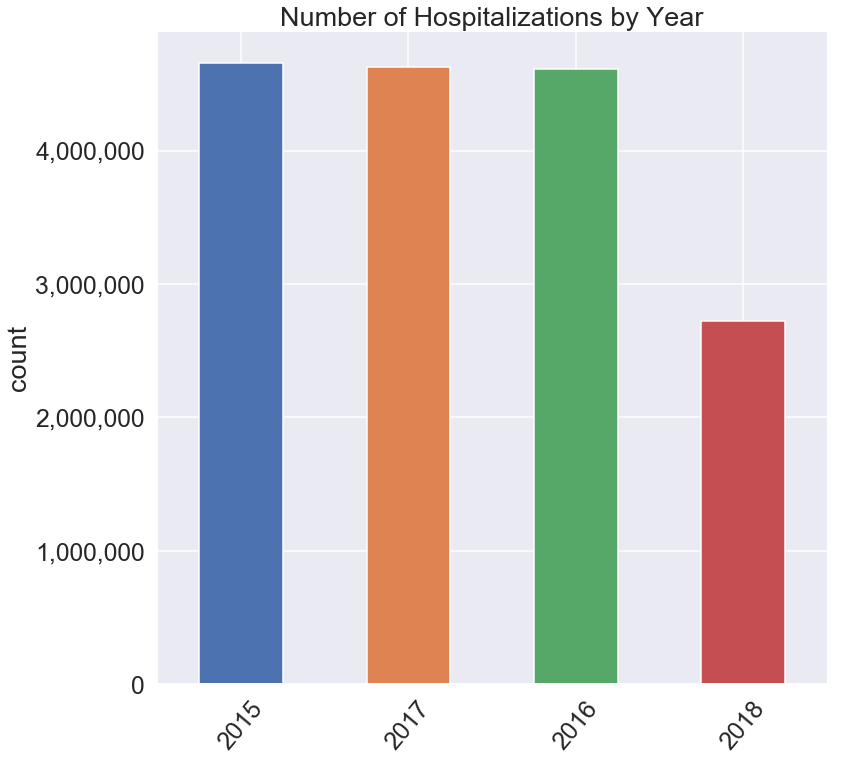

In [34]:
count_plot(df = hospi_data_clean, col_name = 'ANO_CMPT',
           title = 'Number of Hospitalizations by Year', xlabel = '', ylabel = 'count')

> **Plot Number of Hospitalizations by Month**

In [35]:
#Group hospitalizations by month

group_month = hospi_data_clean[['ANO_CMPT','MES_CMPT','ESPEC_CAT']].groupby(['ANO_CMPT','MES_CMPT'], as_index = False).count()

In [36]:
# Especialty of the bed
# Create dictionary with months.

month = {1:'January',2:'February', 3:'March', 4:'April', 5:'May',
         6:'June', 7:'July', 8:'August', 9: 'September', 10:'October', 
         11:'Novemeber', 12:'December'}

# Map dictionary to a new column

group_month['MES_CMPT'] = [month[item] for item in group_month.MES_CMPT]

Text(0,0.5,'Count of Hospitalizations')

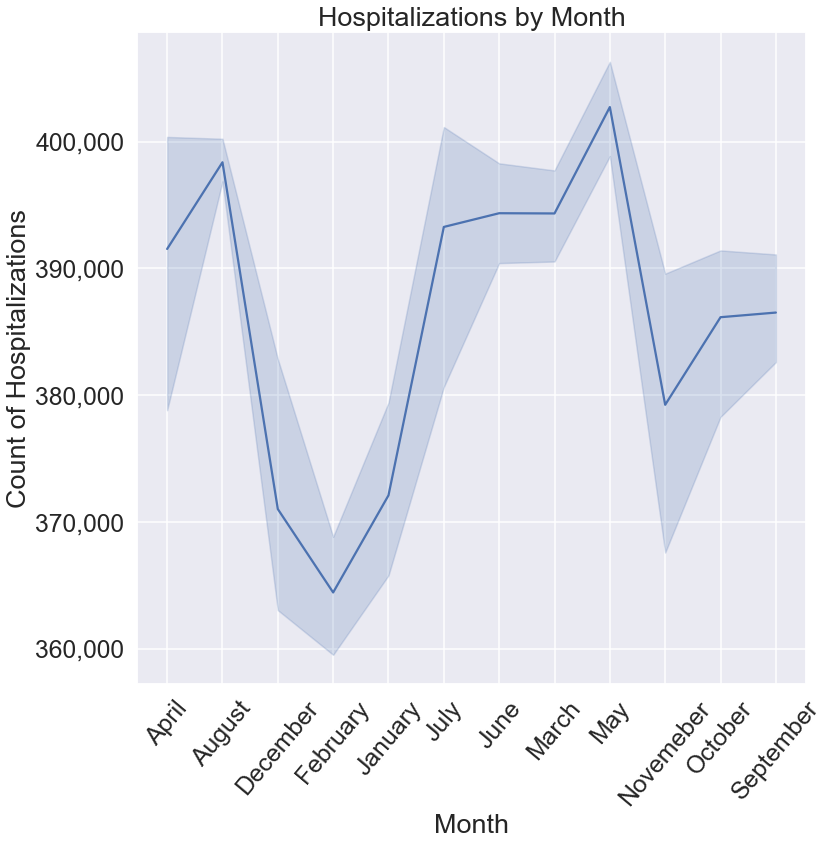

In [37]:
ax = sns.lineplot(x = group_month.MES_CMPT,  y = group_month.ESPEC_CAT, markers=True)

ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

plt.title('Hospitalizations by Month')
plt.xlabel('Month')
plt.xticks(rotation = 50)
plt.ylabel('Count of Hospitalizations')

The most hospitalizations are 400K in a month and least 360K. In general the peak tends to be March and May and lowest point on December, January, February. 

## *Especialty of Bed*

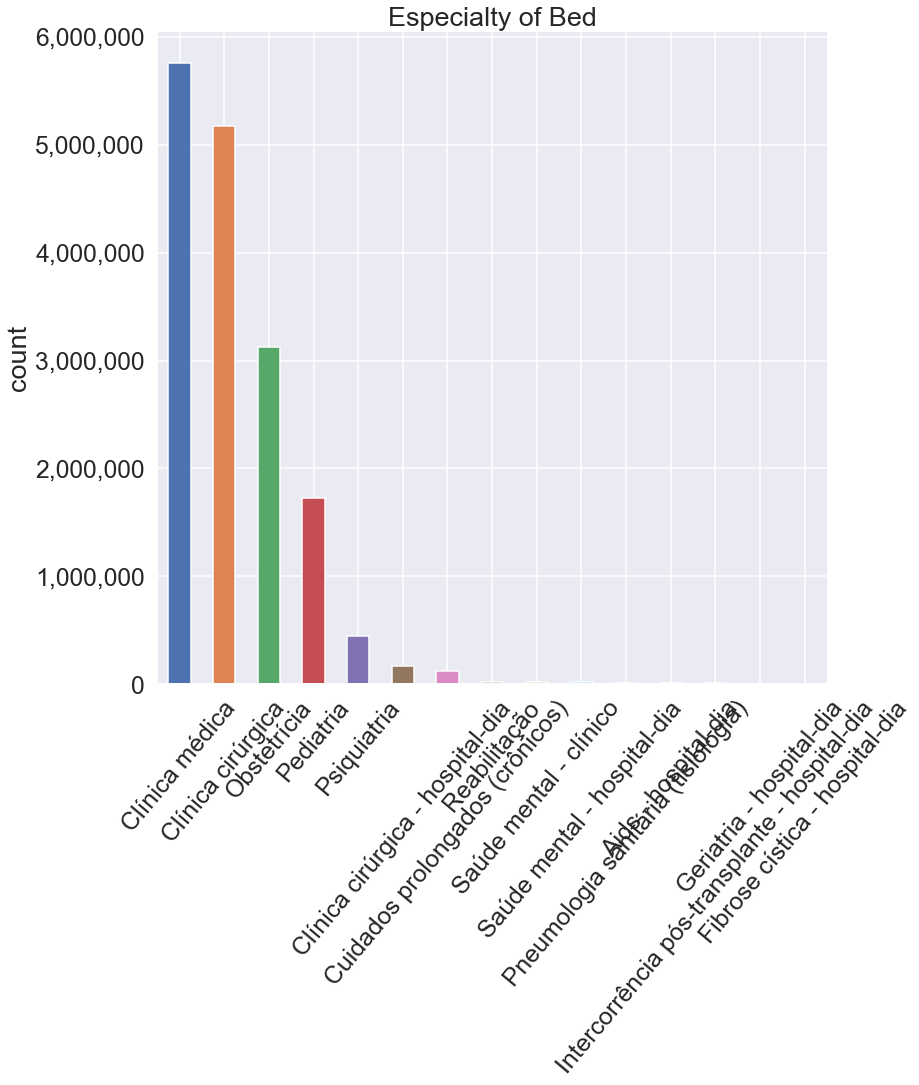

In [38]:
count_plot(df = hospi_data_clean, col_name = 'espec_name', title = "Especialty of Bed")

## *Hospitals with Most Cases*

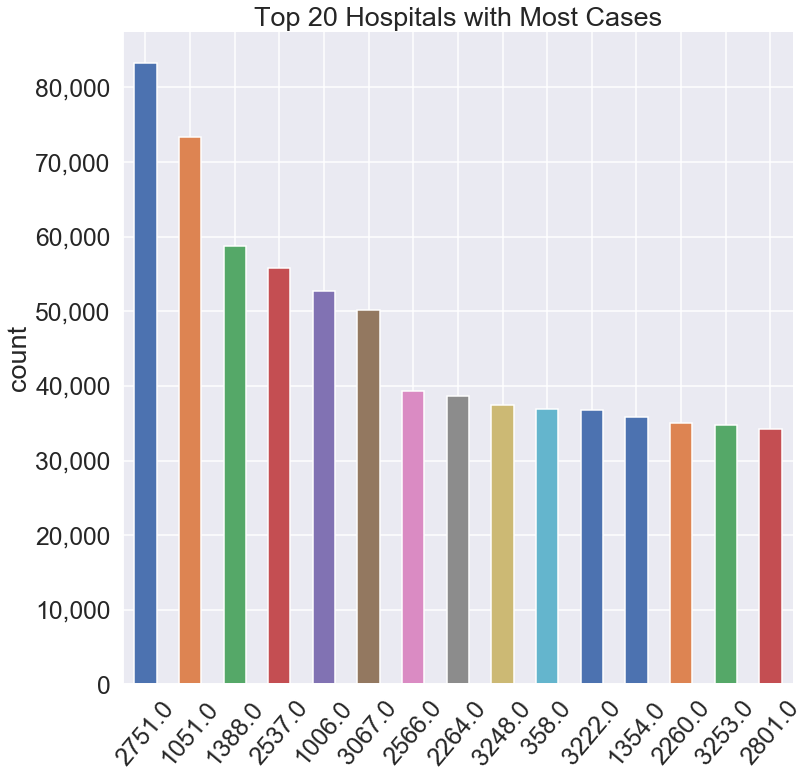

In [39]:
count_plot_slice(df = hospi_data_clean, col_name = 'CGC_HOSP_CAT', head = 15, 
                     title = 'Top 20 Hospitals with Most Cases', xlabel = '', ylabel = 'count')

Cases are strongly distributed across hospitals. The hospital with most cases has 80K cases in the dataset.

Text(0.5,0,'Log of Count')

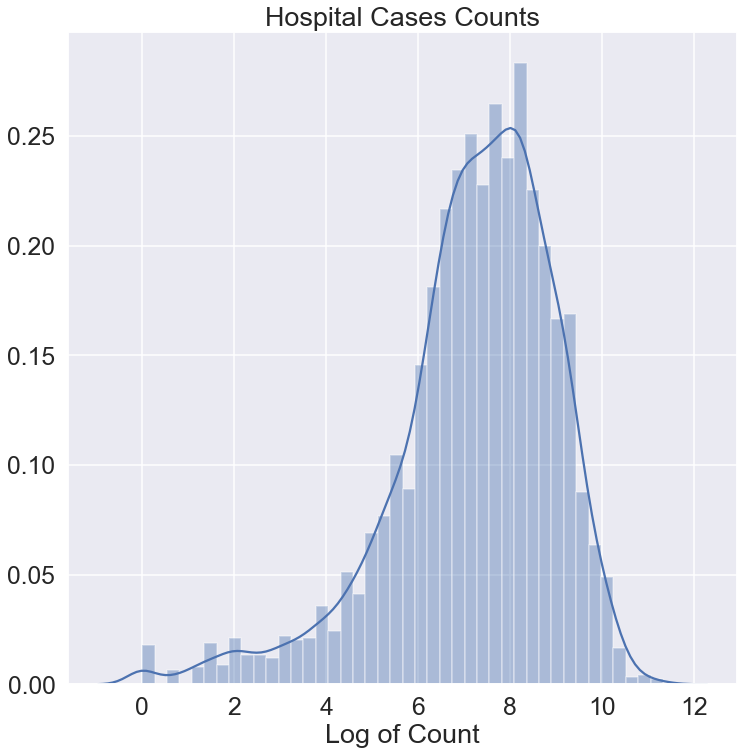

In [40]:
cgc_hosp_count = pd.DataFrame(hospi_data_clean.CGC_HOSP_CAT.value_counts()).reset_index()

sns.distplot(np.log(cgc_hosp_count['CGC_HOSP_CAT']))

plt.title("Hospital Cases Counts")

plt.xlabel('Log of Count')

Distribition is somewhat right skewed. This suggests that there are a few hospital with large amounts of cases when compared with other hospitals.

## *Character of Hospitalization*

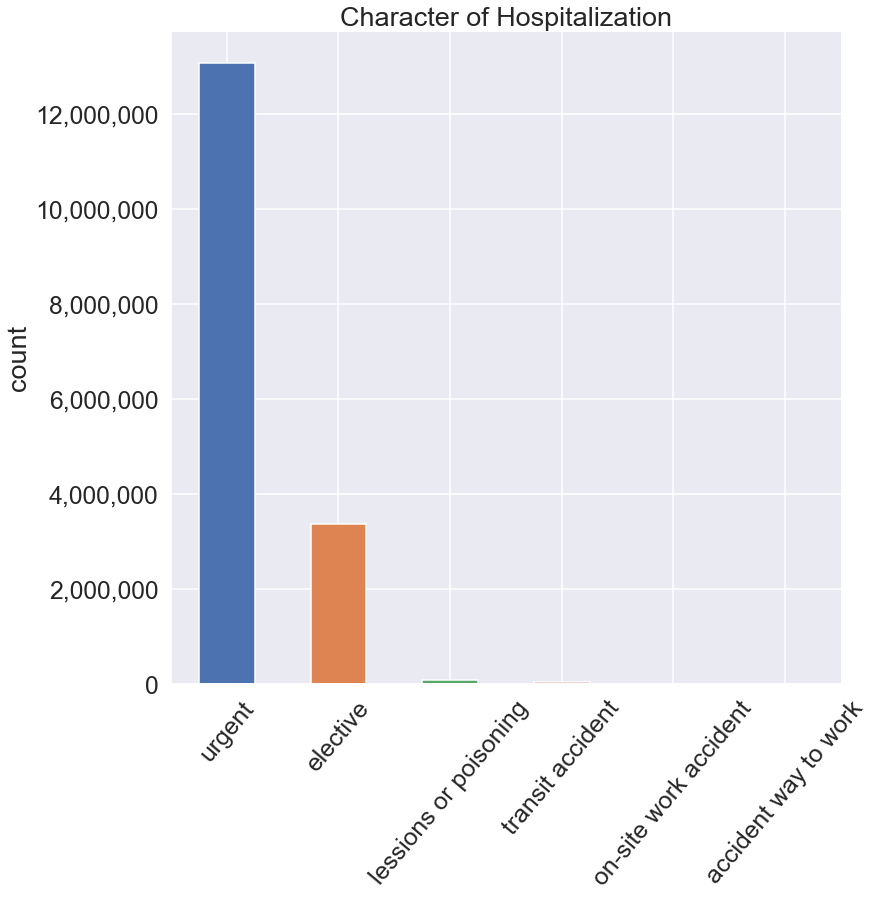

In [41]:
count_plot(df = hospi_data_clean, col_name = 'car_int_name',
           title = 'Character of Hospitalization', xlabel = '', ylabel = 'count')

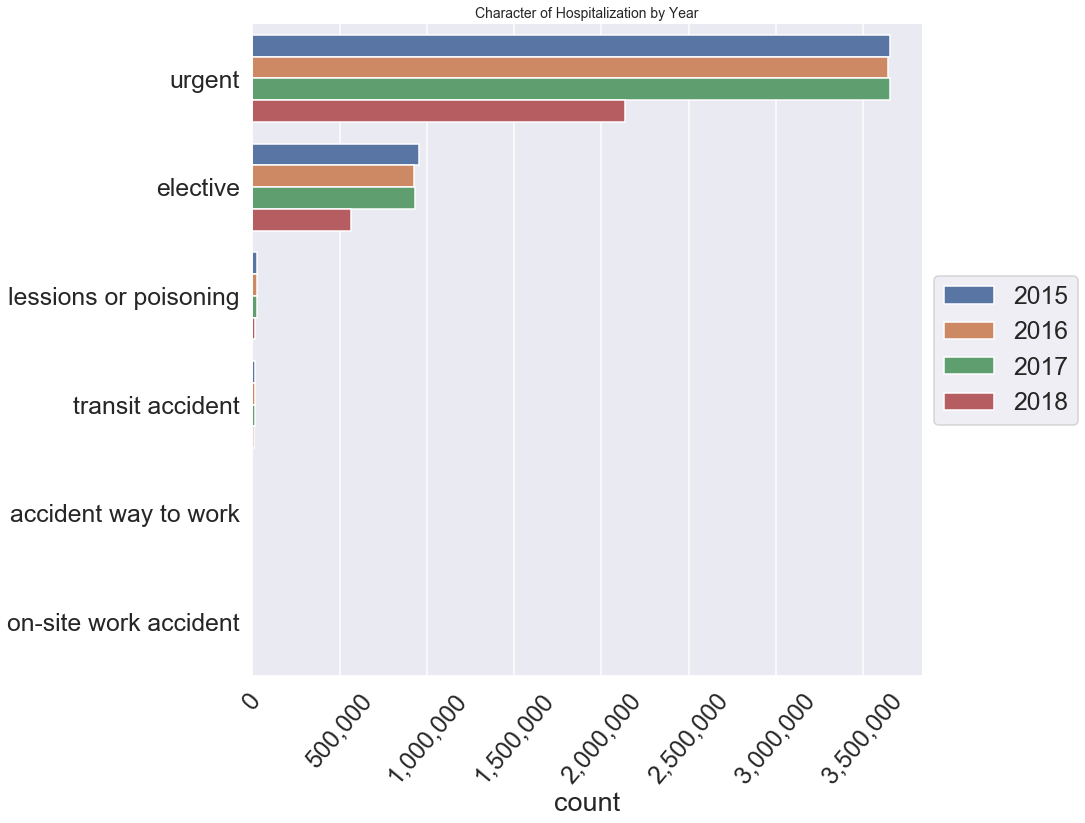

In [42]:
count_plot_hue(df = hospi_data_clean, col_name = 'car_int_name', 
               hue = 'ANO_CMPT',title = 'Character of Hospitalization by Year', 
               ylabel = '', xlabel = 'count')

Most common type of hospitalization by far is urgent.

## *Complexity Level*

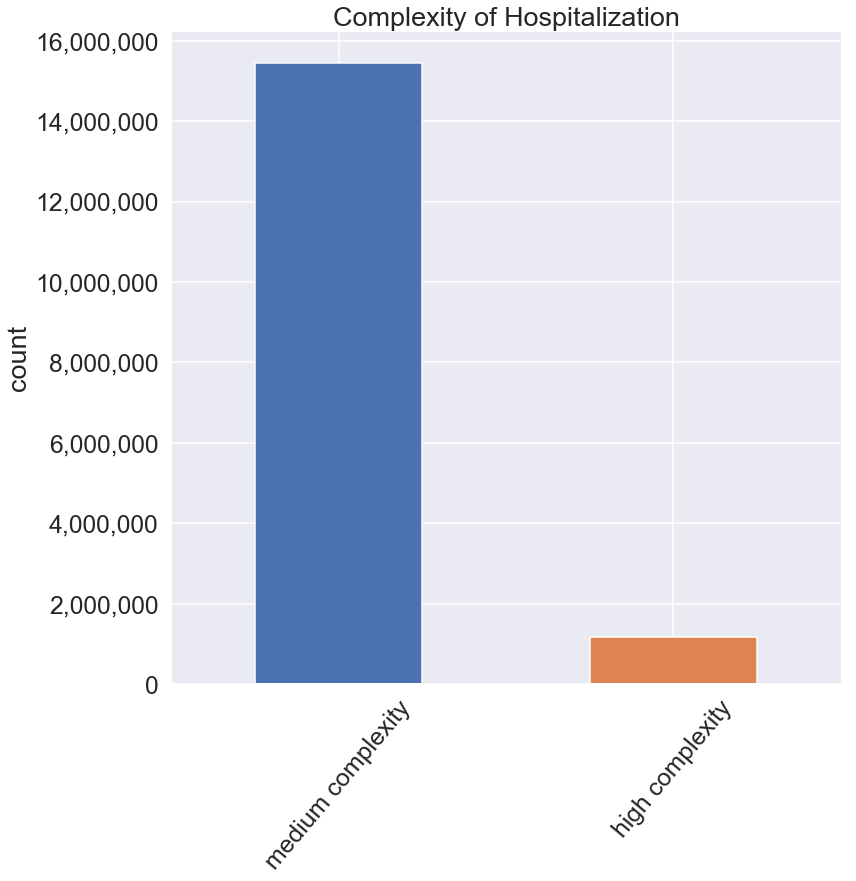

In [43]:
count_plot(df = hospi_data_clean, col_name = 'complex_name',
           title = 'Complexity of Hospitalization', xlabel = '', ylabel = 'count')

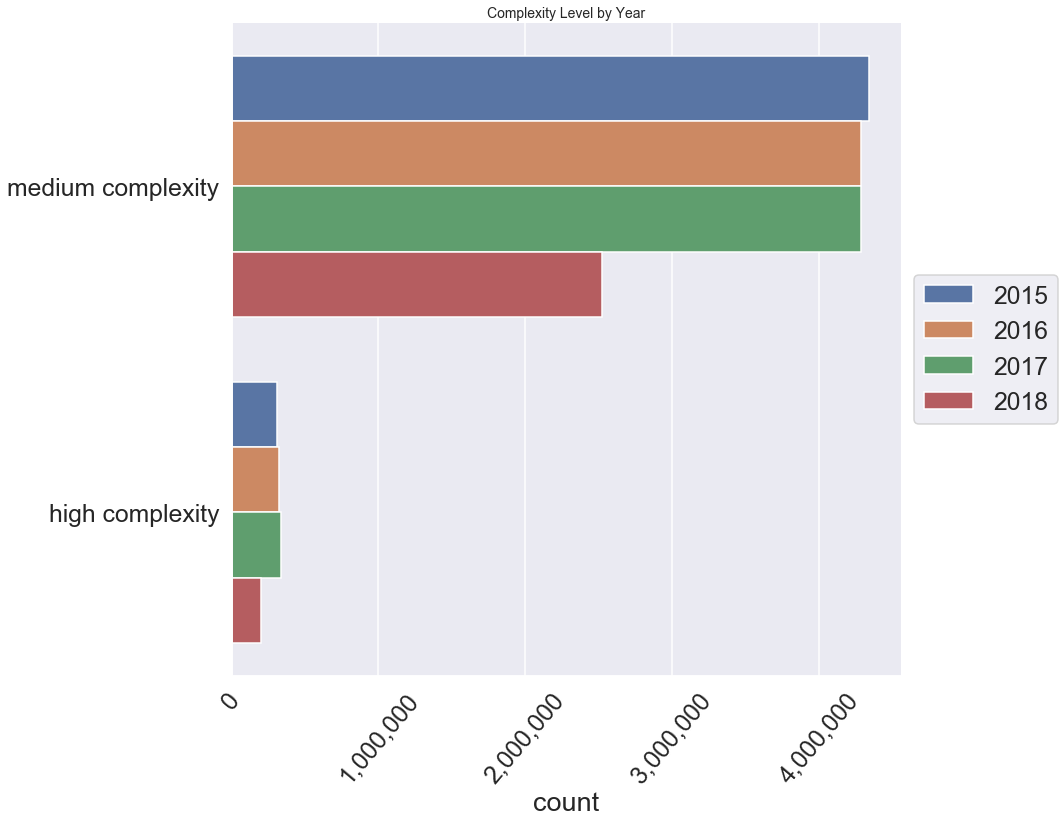

In [44]:
count_plot_hue(df = hospi_data_clean, col_name = 'complex_name', 
               hue = 'ANO_CMPT',title = 'Complexity Level by Year', 
               ylabel = '', xlabel = 'count')

Complexity level is medium complexity by far. No hospitalization was marked as 'basic attention'.

## *Reason for Stay/Exit - Group*

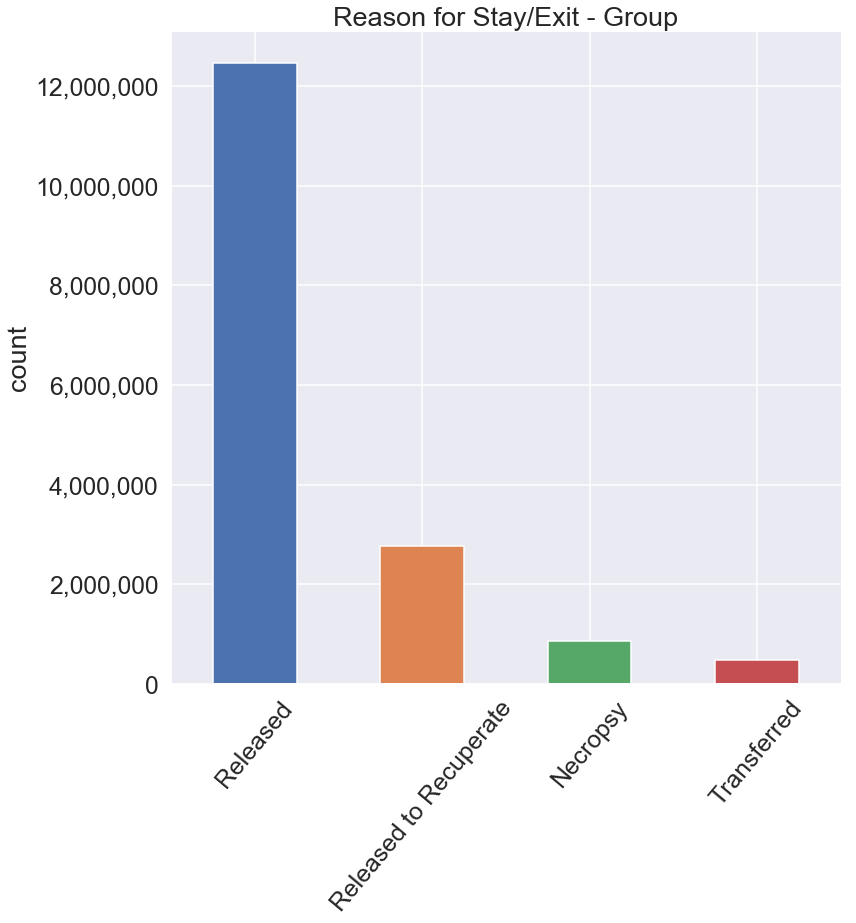

In [45]:
count_plot(df = hospi_data_clean, col_name = 'cobranca_group',
           title = 'Reason for Stay/Exit - Group', xlabel = '', ylabel = 'count')

The majority of reasons for exit group is released. With a proportion release to recuperate, necropsy or transferred.

## *Reason for Stay/Exit*

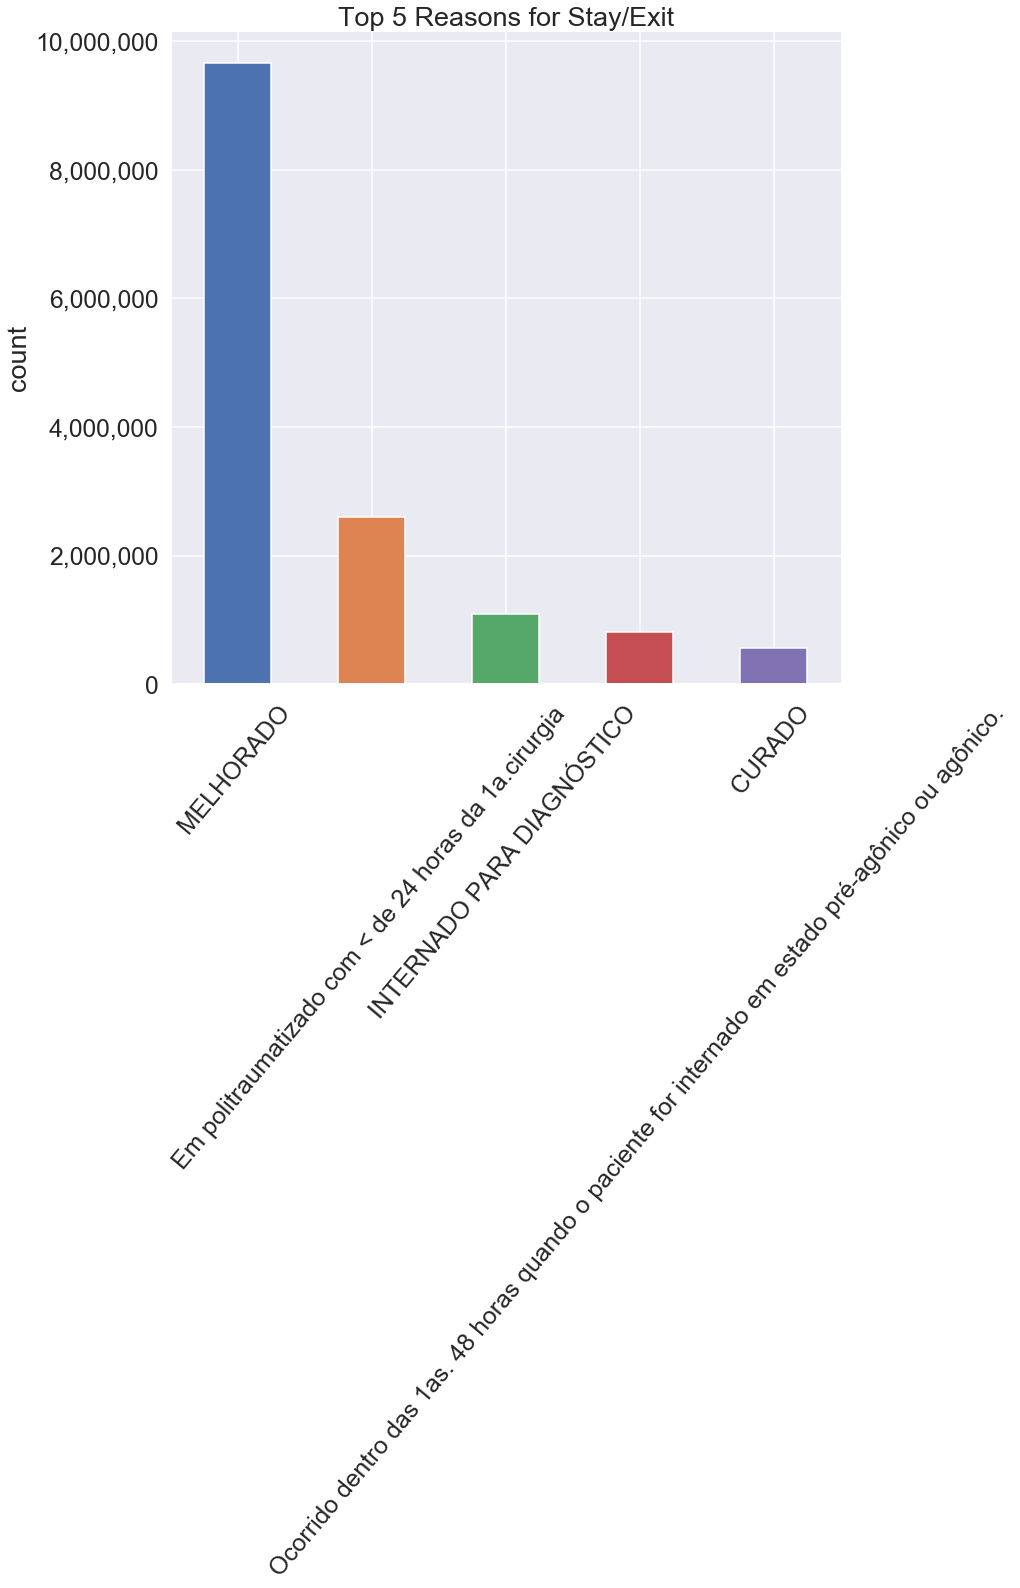

In [46]:
count_plot_slice(df = hospi_data_clean, col_name = 'cobranca_name', head = 5, 
                     title = 'Top 5 Reasons for Stay/Exit', xlabel = '', ylabel = 'count')

In [47]:
pd.DataFrame(hospi_data_clean['cobranca_name'].value_counts())

cobranca_name
MELHORADO                                                 9665636
Em politraumatizado com < de 24 horas da 1a.cir...        2604471
INTERNADO PARA DIAGNÓSTICO                                1095517
Ocorrido dentro das 1as. 48 horas quando o paci...         805235
CURADO                                                     553550
TISIOLOGIA                                                 487374
POR CARACTERÍSTICAS PRÓPRIAS DA DOENÇA                     322336
PARA OUTRA INTERNAÇÃO (OUTRO DIAGNÓSTICO)                  149074
Em politraumatizado 24 a 48 horas após a 1a.cir...         134612
A PEDIDO                                                   121665
POR INTERCORRÊNCIA DO PROCEDIMENTO                         114573
ADMINISTRATIVA                                              79160
EVASÃO                                                      62238
POR MOTIVO SOCIAL                                           54305
POR IMPOSSIBILIDADE DE VIVÊNCIA SÓClO-FAMILIAR              31620
Ocorrido dentro das 1 as 48 horas quando o paci...          29156
Ocorrido a partir de 48 horas após a internação.            25317
Em politraumatizado > de 72 hs. Após a 1a. ciru...          20556
Em politraumatizado 48 a 72 horas após a 1a.cir...           9398
PARA COMPLEMENTAÇÃO                                          5889
POR DOENÇA CRÔNICA                                            544
PSIQUIATRIA                                                   447
Em cirurgia de emergência 24 a 48 horas após a ...            198
Em cirurgia de emergência com menos de 24 da pr...            144
Em cirurgia de emergência 48 a 72 horas após a ...             84

Improved is by far the most common reason for stay/exit.

## *Type of Intensive Care Unit Bed*

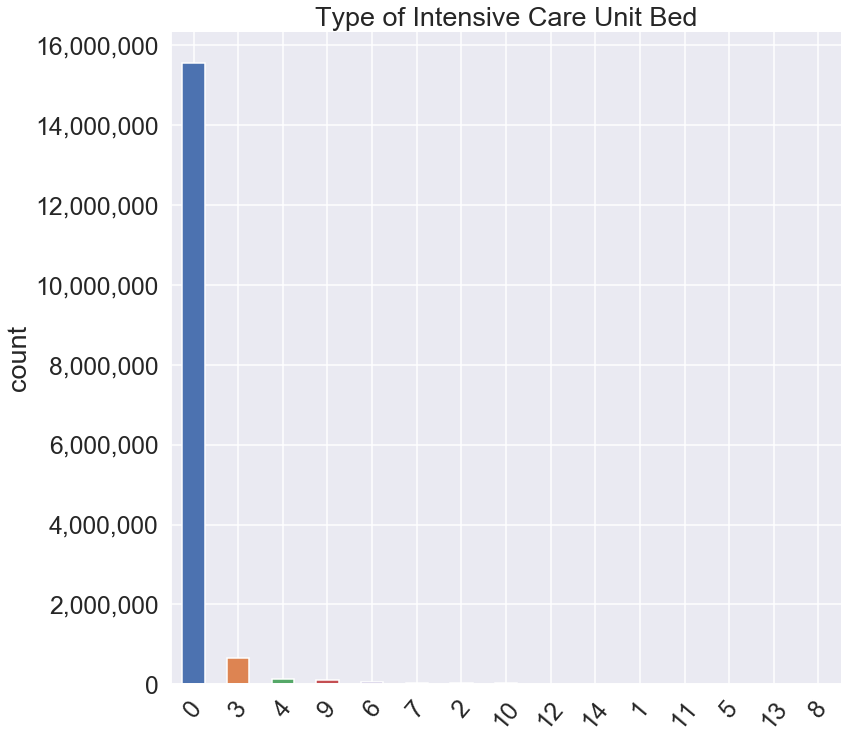

In [36]:
count_plot(df = hospi_data_clean, col_name = 'MARCA_UTI_CAT',
           title = 'Type of Intensive Care Unit Bed', xlabel = '', ylabel = 'count')

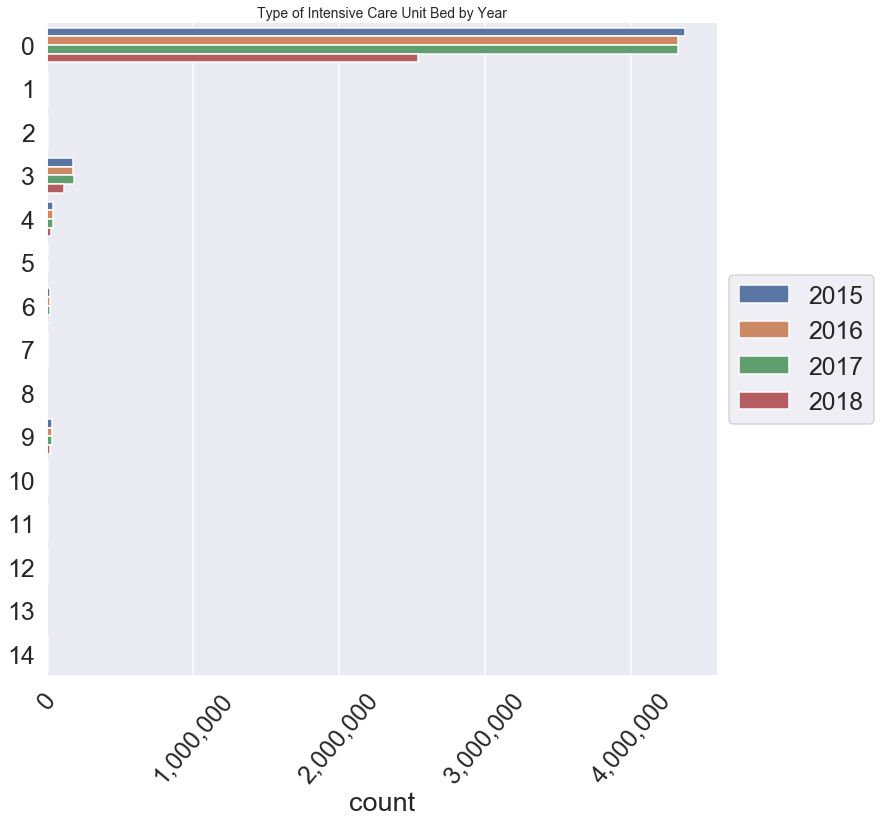

In [37]:
count_plot_hue(df = hospi_data_clean, col_name = 'MARCA_UTI_CAT', 
               hue = 'ANO_CMPT',title = 'Type of Intensive Care Unit Bed by Year', 
               ylabel = '', xlabel = 'count')

Susbtantial proportion of patients do not get a venereal exam performed. 

## *Venereal Disease Exam*

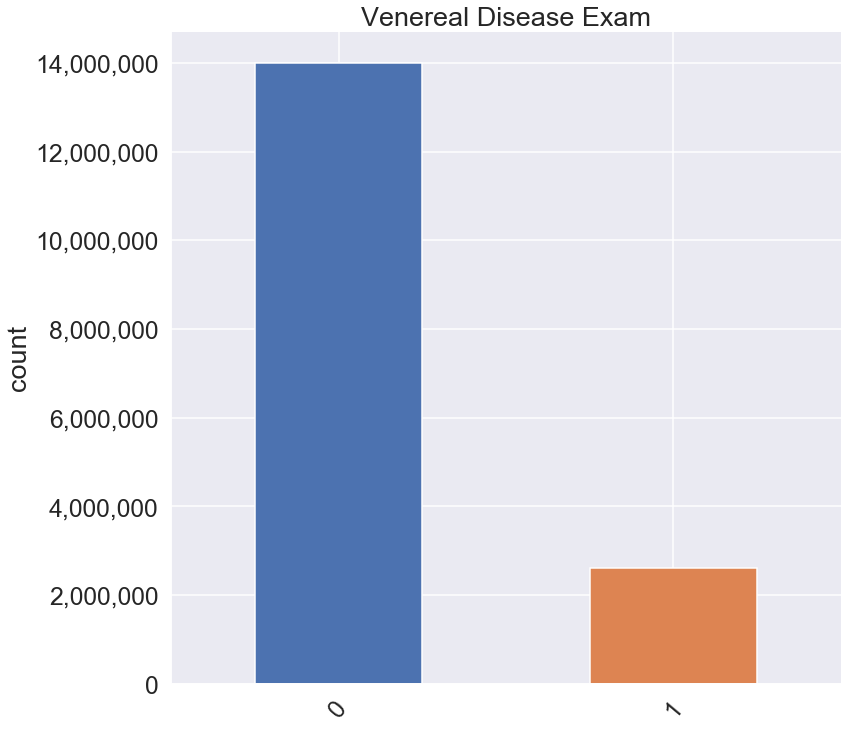

In [48]:
count_plot(df = hospi_data_clean, col_name = 'IND_VDRL_CAT',
           title = 'Venereal Disease Exam', xlabel = '', ylabel = 'count')

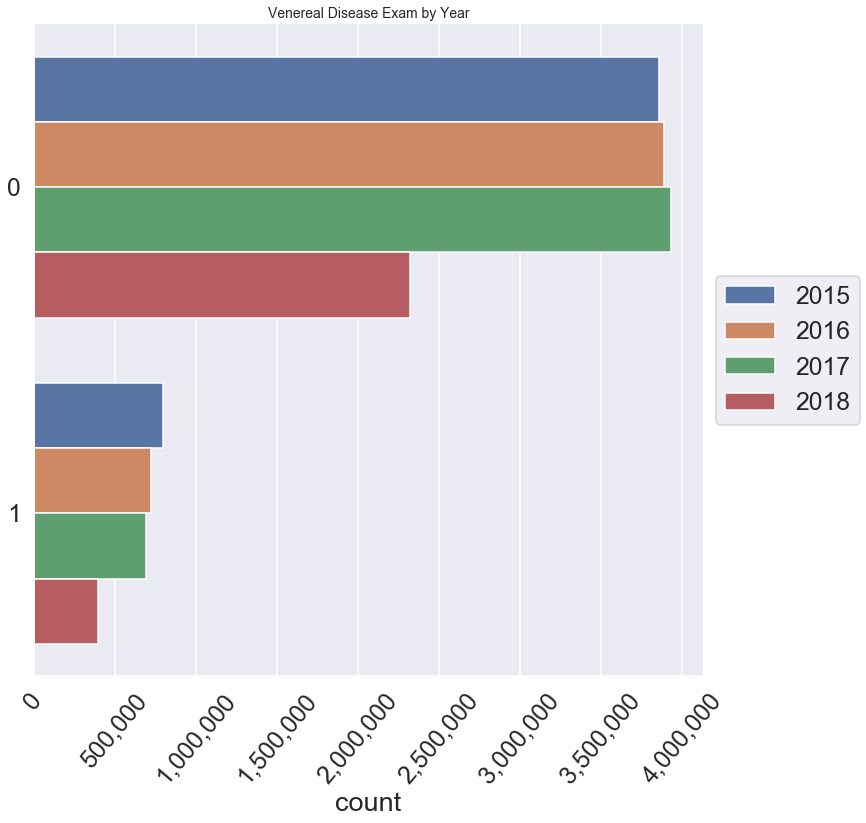

In [49]:
count_plot_hue(df = hospi_data_clean, col_name = 'IND_VDRL_CAT', 
               hue = 'ANO_CMPT',title = 'Venereal Disease Exam by Year', 
               ylabel = '', xlabel = 'count')

Susbtantial proportion of patients do not get a venereal exam performed. 

# *Contraception Used 1 & 2*

In [50]:
hospi_data_clean.CONTRACEP1_CAT.value_counts()

0     16479054
8        69675
10       47573
12        4595
1         4428
11        4418
6         2659
7          876
9          722
2          284
4          230
5          160
3          156
Name: CONTRACEP1_CAT, dtype: int64

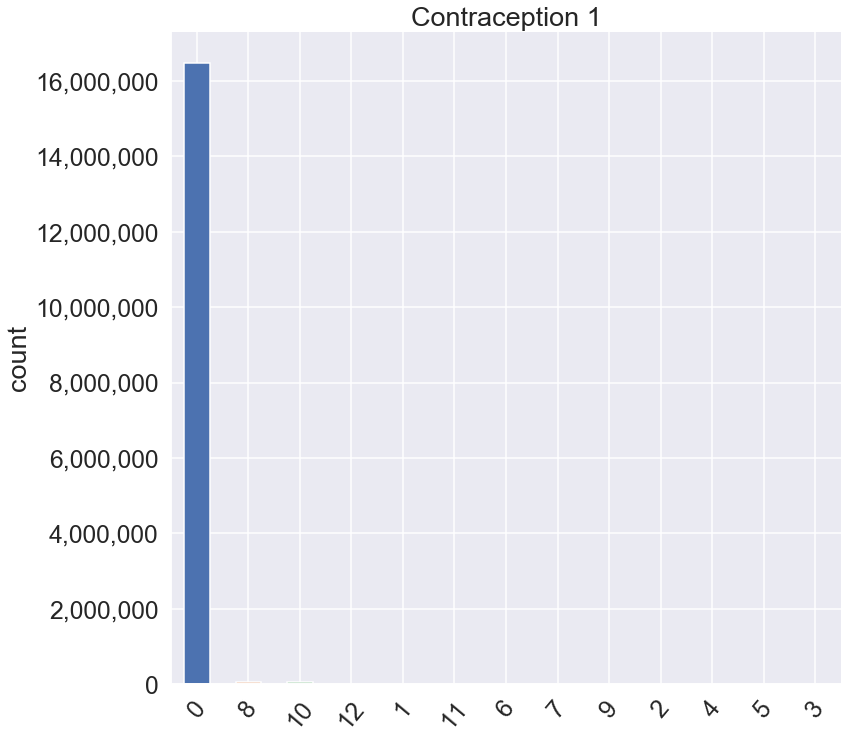

In [51]:
count_plot(df = hospi_data_clean, col_name = 'CONTRACEP1_CAT',
           title = 'Contraception 1', xlabel = '', ylabel = 'count')

In [52]:
hospi_data_clean.CONTRACEP2_CAT.value_counts()

0     16527531
8        35566
10       33594
11        6767
12        4598
1         3781
6         1248
7          556
9          545
2          253
4          197
3          116
5           78
Name: CONTRACEP2_CAT, dtype: int64

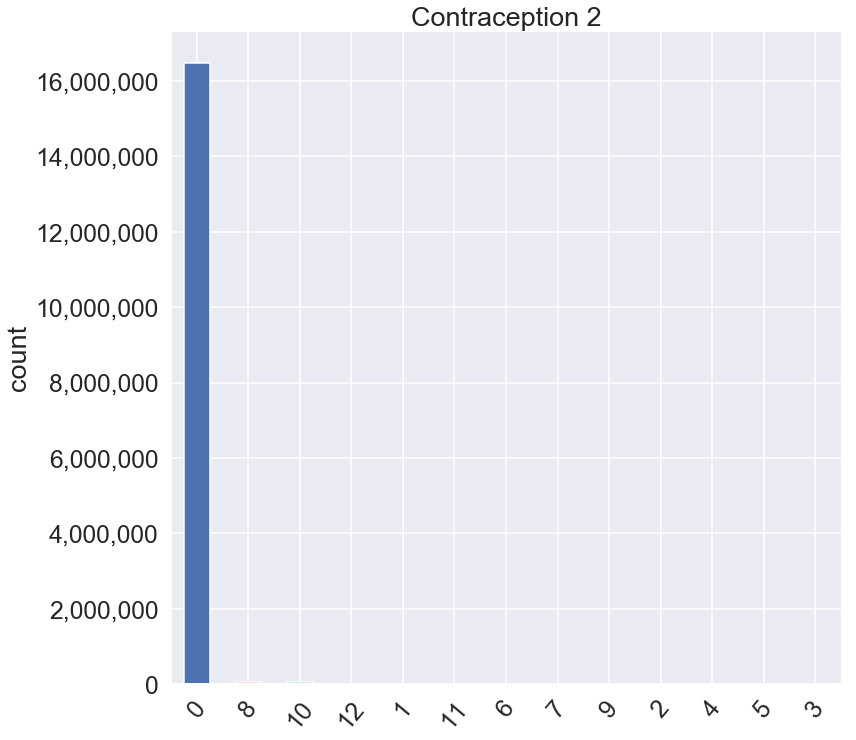

In [53]:
count_plot(df = hospi_data_clean, col_name = 'CONTRACEP1_CAT',
           title = 'Contraception 2', xlabel = '', ylabel = 'count')

Vast majority of cases did not use contraception in their hospitalization.

## *Days of Stay: Length of Hospitalization, ICU days, Companion Days, Intermediary Unit*

In [54]:
hospi_data_clean[['UTI_MES_TO','UTI_INT_TO','DIAR_ACOM','DIAS_PERM']].describe()

UTI_MES_TO     MARCA_UTI    UTI_INT_TO     DIAR_ACOM     DIAS_PERM
count  1.661483e+07  1.661483e+07  1.661483e+07  1.661483e+07  1.661483e+07
mean   4.613846e-01  4.841298e+00  4.942368e-02  1.945878e+00  5.392590e+00
std    2.893281e+00  1.863319e+01  9.259680e-01  4.384568e+00  8.022709e+00
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  3.000000e+00
75%    0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00  6.000000e+00
max    3.020000e+02  9.900000e+01  2.280000e+02  3.400000e+02  3.640000e+02

+ **UTI_MES_TO:** mean is ~46 days, with max 302 days. Heavy skew with 75% being 0. 
+ **MARCA_UTI:** mean 18.6 days, with max 99 days.
+ **UTI_INT_TO:** mean  49 days, with max 228 days.
+ **DIAR_ACOM:** mean 49.4 days, with max 340 days.
+ **DIAS_PERM:** mean hospitalization stay is 5.39 days, 75th 6 days and max 364 days.

In [55]:
min_max_scaler = preprocessing.MinMaxScaler()
days_scaled = min_max_scaler.fit_transform(hospi_data_clean[['DIAS_PERM']])
df_days_norm = pd.DataFrame(days_scaled)

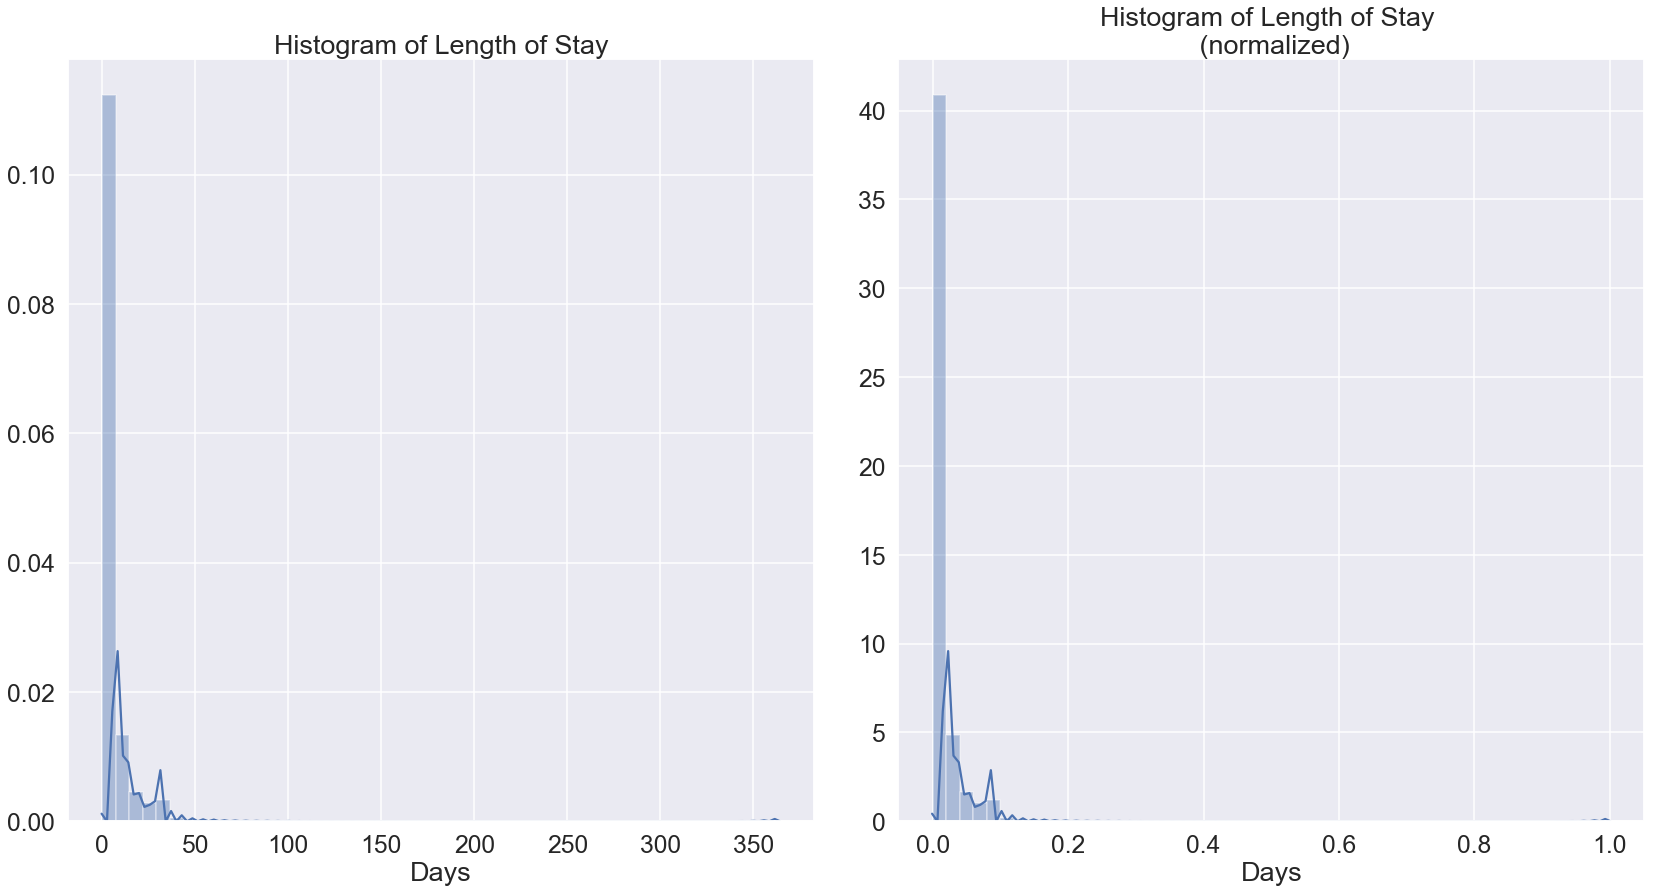

In [56]:
# Plot age lenght of stay - - All Years/Total

plt.subplot(221)

sns.distplot(hospi_data_clean['DIAS_PERM'])

plt.title('Histogram of Length of Stay')

plt.xlabel('Days')

plt.subplot(222)

sns.distplot(df_days_norm)

plt.title("Histogram of Length of Stay \n (normalized)")

plt.xlabel('Days')

plt.tight_layout(rect=[2, 2, 4, 4])

Length of stay has a heavy skew to the left, with most hospitalization being somewhat short and some outliers with long hospitalizations.

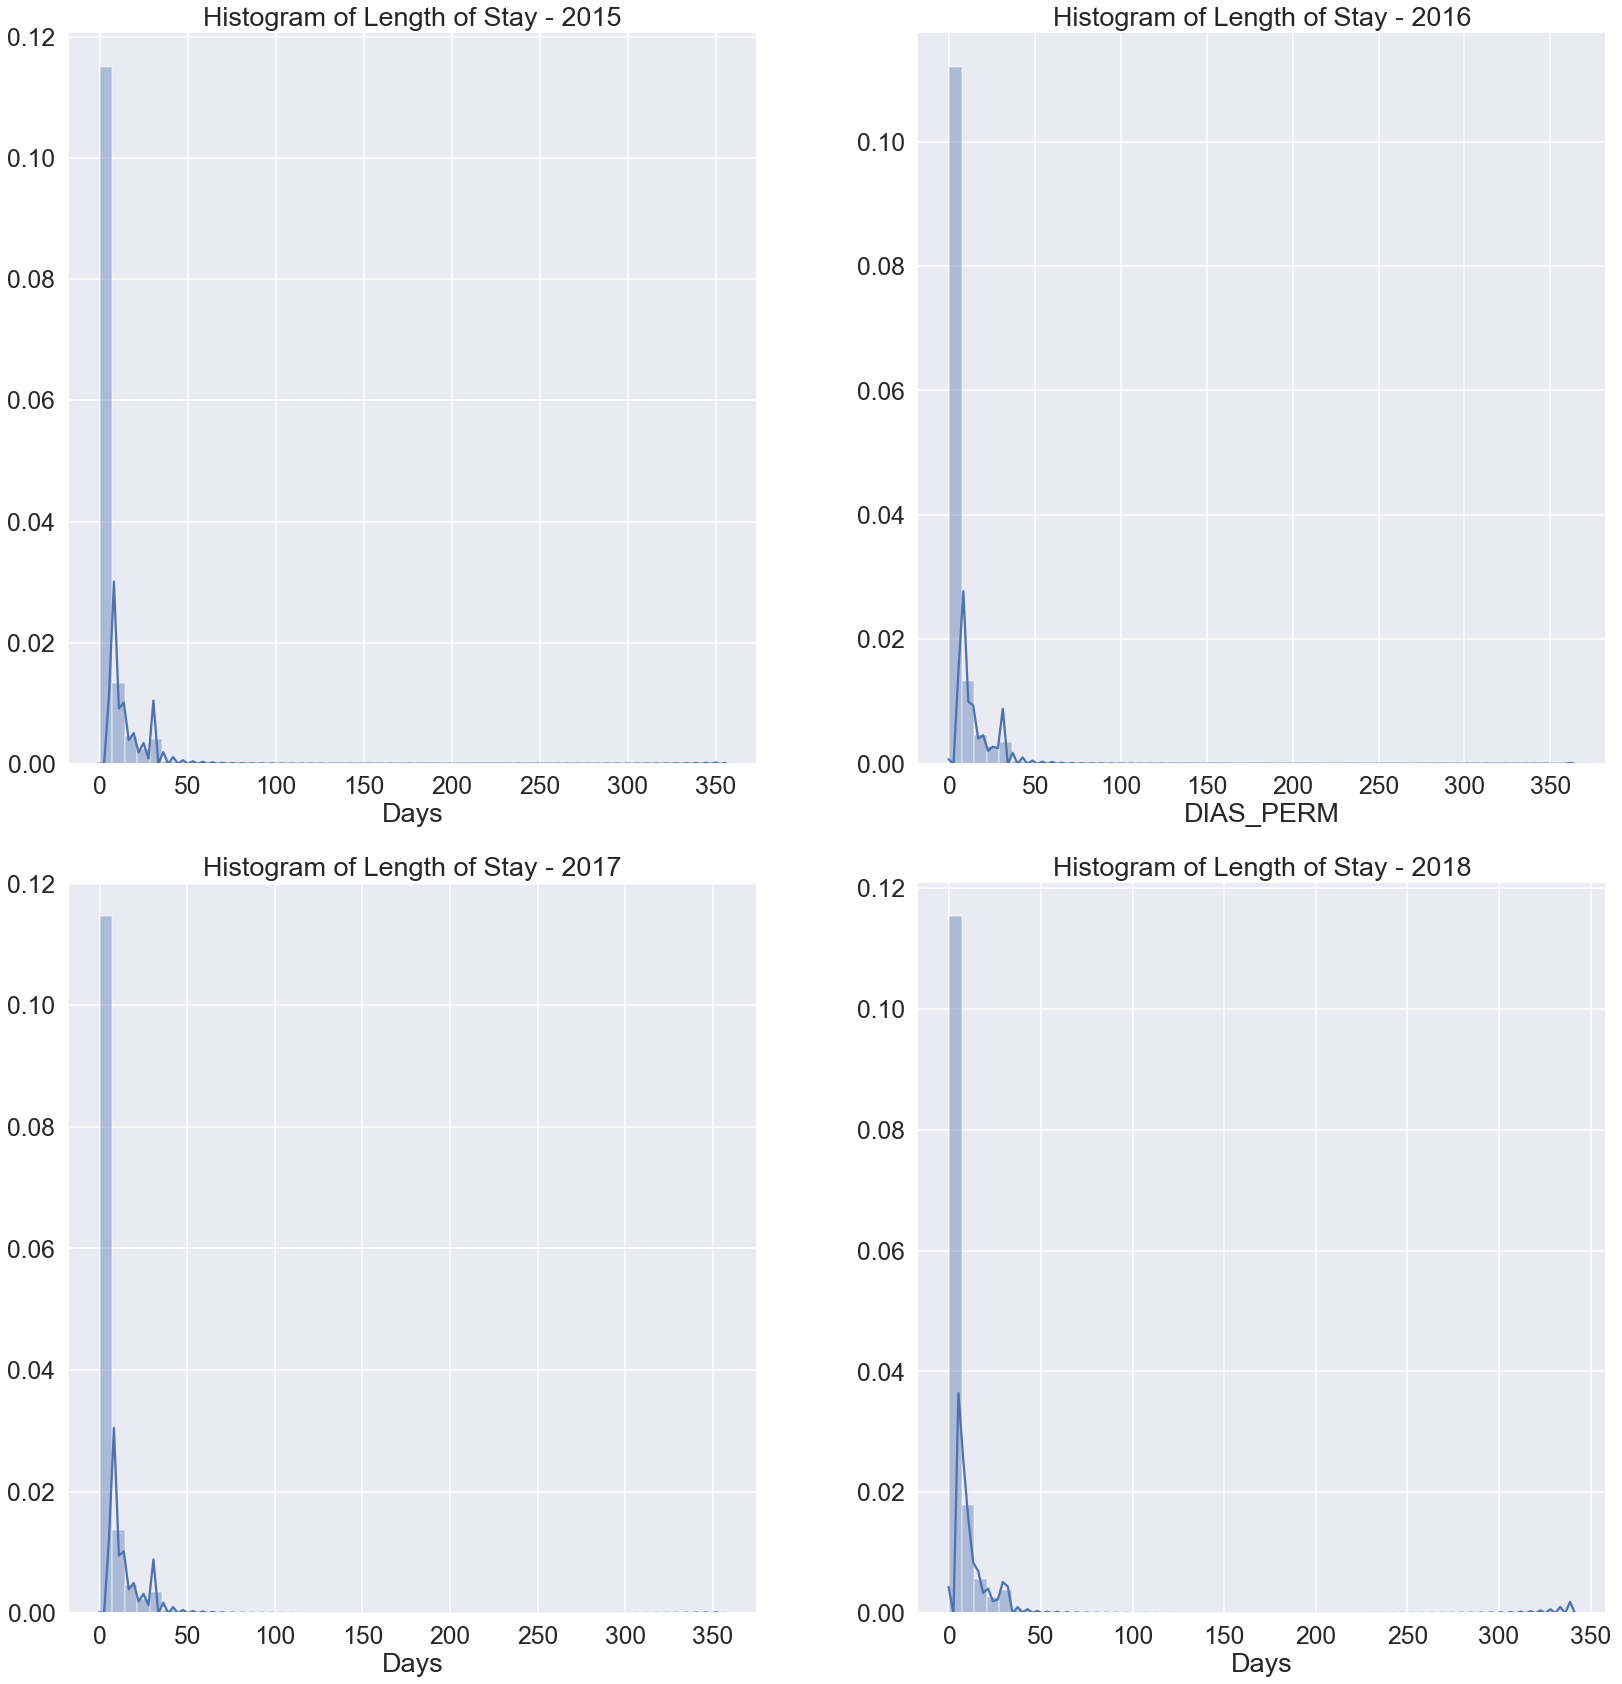

In [57]:
plt.subplot(221)

sns.distplot(hospi_2015['DIAS_PERM'])

plt.title("Histogram of Length of Stay - 2015")

plt.xlabel('Days')

plt.subplot(222)

sns.distplot(hospi_2016['DIAS_PERM'])

plt.title("Histogram of Length of Stay - 2016")

plt.subplot(223)

sns.distplot(hospi_2017['DIAS_PERM'])

plt.title("Histogram of Length of Stay - 2017")

plt.xlabel('Days')

plt.subplot(224)

sns.distplot(hospi_2018['DIAS_PERM'])

plt.title("Histogram of Length of Stay - 2018")

plt.xlabel('Days')

plt.tight_layout(rect=[2, 2, 4, 4])

Year breakdowns follows the pattern of the overall data. Length of stay has a heavy skew to the left, with most hospitalization being somewhat short and some outliers with long hospitalizations.

** Normal Distribution Tests of the Diagnosis Counts**

**D’Agostino and Pearson’s Normality Test**

*From the documentation: This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s, test that combines skew and kurtosis to produce an omnibus test of normality.*

**Anderson-Darling Normality Test:** This test has been shown to have more statistical power for testing normality.

*From the documentation: The Anderson-Darling tests the null hypothesis that a sample is drawn from a population that follows a particular distribution. For the Anderson-Darling test, the critical values depend on which distribution is being tested against. This function works for normal, exponential, logistic, or Gumbel (Extreme Value Type I) distributions.

> H0: Distribution is normal.

> H1: Distribution is not normal.

> alpha = 0.05

In [58]:
# Normality Tests

norm_dist_tests(df = hospi_data_clean, col_name = 'DIAS_PERM')

D’Agostino and Pearson’s:  NormaltestResult(statistic=17053863.32528353, pvalue=0.0)
Anderson-Darling:  AndersonResult(statistic=2189076.6247634925, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Distribution Statistics:  DescribeResult(nobs=16614830, minmax=(0, 364), mean=5.392589511899911, variance=64.36386134284399, skewness=4.815603942567032, kurtosis=59.59394706054896)


The normality and distribution tests suggest that the counts of the principal diagnosis variable are not normally distributed.

In [59]:
# ECDF

x, y = ecdf(hospi_data_clean['DIAS_PERM'])

x_theor, y_theor = theor_ecdf(df = hospi_data_clean, col_name = 'DIAS_PERM', seed = 42)

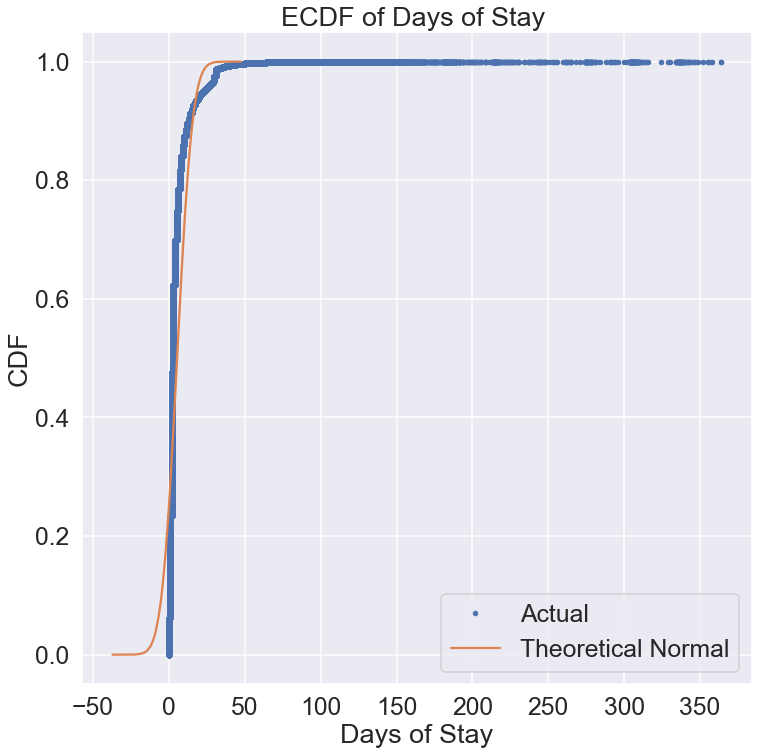

In [60]:
#Graph actual cumulative sample distribution

plt.plot(x, y, marker='.', linestyle='none', label = 'Actual')

plt.plot(x_theor, y_theor, label = 'Theoretical Normal')

plt.legend()

plt.title("ECDF of Days of Stay ")

plt.xlabel("Days of Stay")

plt.ylabel('CDF')

plt.show()

The actual distribution follow the theoretical normal distribution up to CDF < 0.8. After 0.8 it diverges, with the actual beign longer at the right tail. 

**Hypothesis Testing:** *Bootstrap Replicates*

> H0: Population mean for days of stay is 5.38

> Ha: Population mean for days of stay is not 5.38

> alpha = 0.05

In [61]:
#Calculate mean

days_cat_count_mean = np.mean(hospi_data_clean['DIAS_PERM'])
days_cat_count_mean

5.392589511899911

In [62]:
# Replicates

%time

n_tries = 10000

days_cat_mean_replicates = bs_sample(hospi_data_clean['DIAS_PERM'], np.mean, size = n_tries)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.82 µs


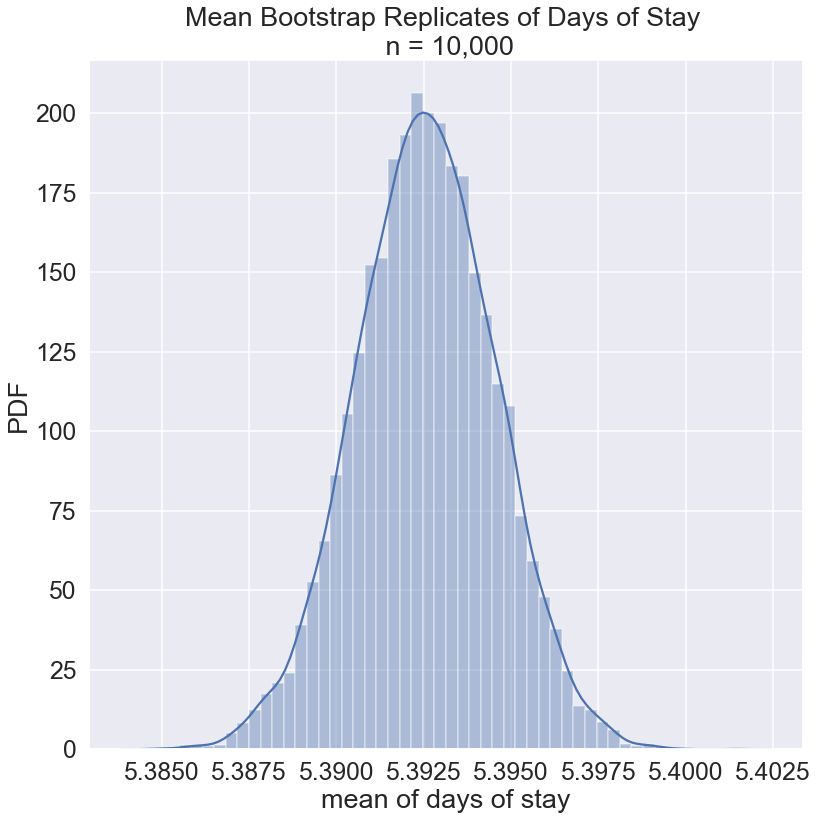

In [63]:
#Create Histogram of Bootstrap Mean Replicates

sns.distplot(days_cat_mean_replicates, norm_hist=True)

plt.ylabel('PDF')

plt.xlabel('mean of days of stay')

plt.title("Mean Bootstrap Replicates of Days of Stay \n n = 10,000")

plt.tight_layout()

* The bootstrap replicates are normally distributed. 
* The distribution contains the sample mean of 5.38

In [64]:
boot_conf_int(ci = [2.5,97.5], mean_rep = days_cat_mean_replicates, 
              mean = days_cat_count_mean)

Bootstrap Mean Replicates 95% CI:  [5.38862754 5.39640916]
P-value of patient age mean replicates:  0.5061


The bootstrap mean replicates shows a 95% confidence interval for diagnosis counts is between 5.39 and 5.39. This is a very tight interval.This range contains our sample mean of 5.39. The p-value is 0.43 which is above the alpha level of 0.05, this means we cannot reject the hypothesis that the mean age is 5.39 cases per diagnosis.

**Hypothesis Testing:** *One Sample T-Test*

> H0: Population mean for days of stay is 5.38

> Ha: Population mean for days of stay is not 5.38

> alpha = 0.05

In [65]:
# One-sided t-test

stats.ttest_1samp(hospi_data_clean['DIAS_PERM'], days_cat_count_mean)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

The p-value is above the alpha level of 0.05. This suggets that we cannot reject the null hypothesis that the population mean is 5.39 days.

## *Procedures Performed*

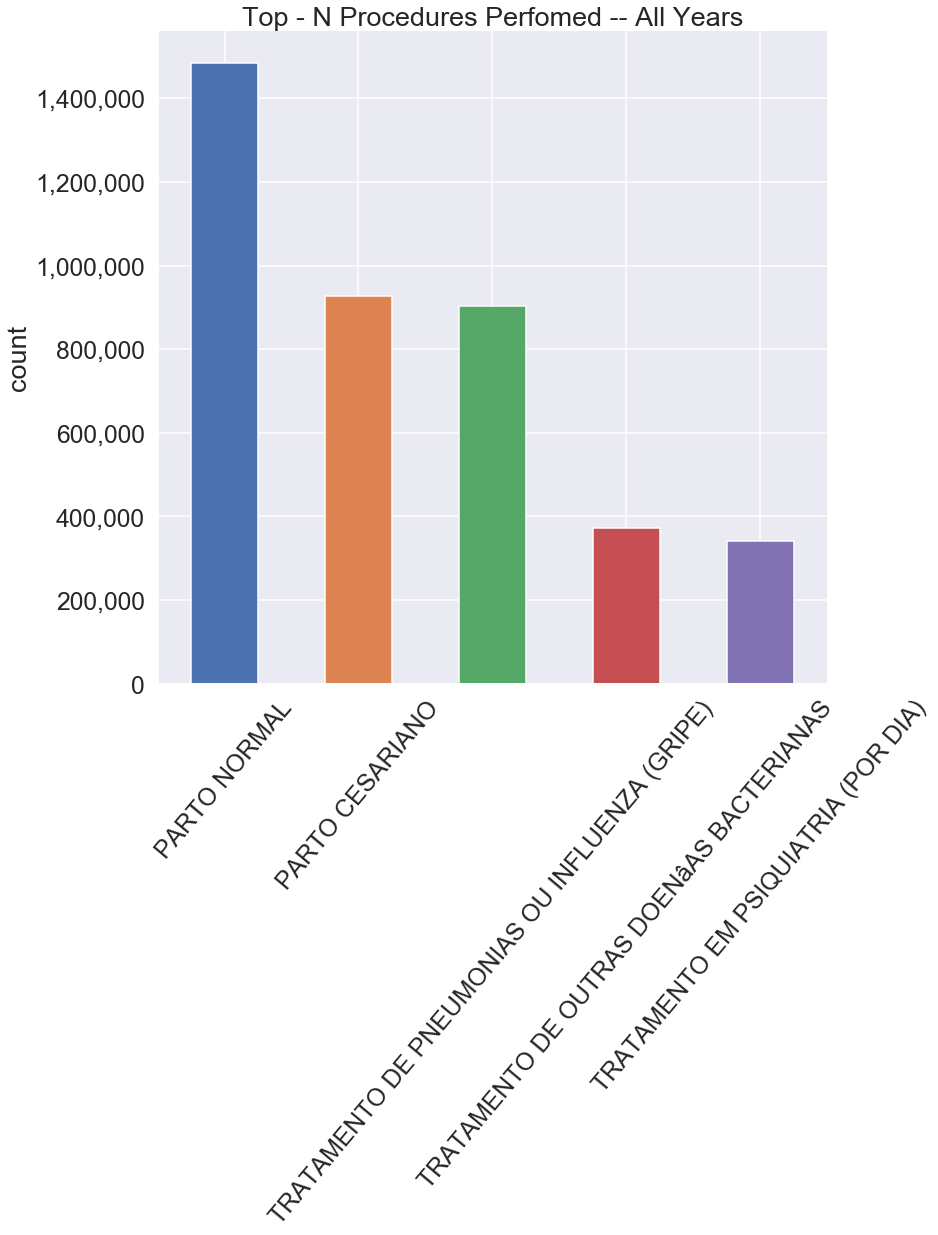

In [66]:
#Top Procedures Performed

count_plot_slice(df = hospi_data_clean, col_name = 'proc_name', head = 5, 
                 title = 'Top - N Procedures Perfomed -- All Years', xlabel = '', ylabel = 'count')

Top procedures performed are normal birth, cesarian birth, treatment for pnemunia, treatment for bacterial diseases, treatment for psychiatric disorders.

While these are the most common procedures, these are a portion of the total procedures and much diversity exists within on procedures performed. 

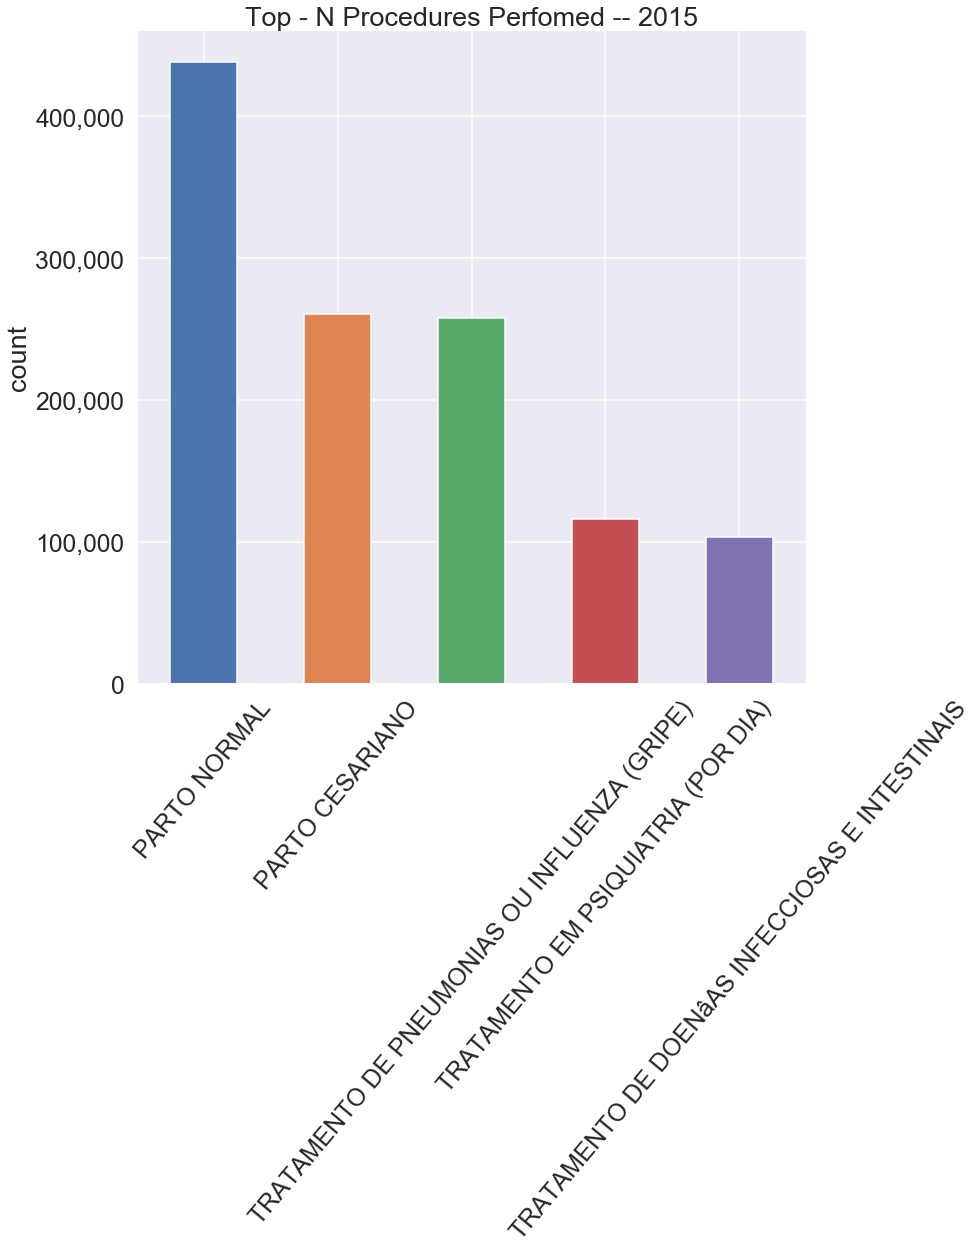

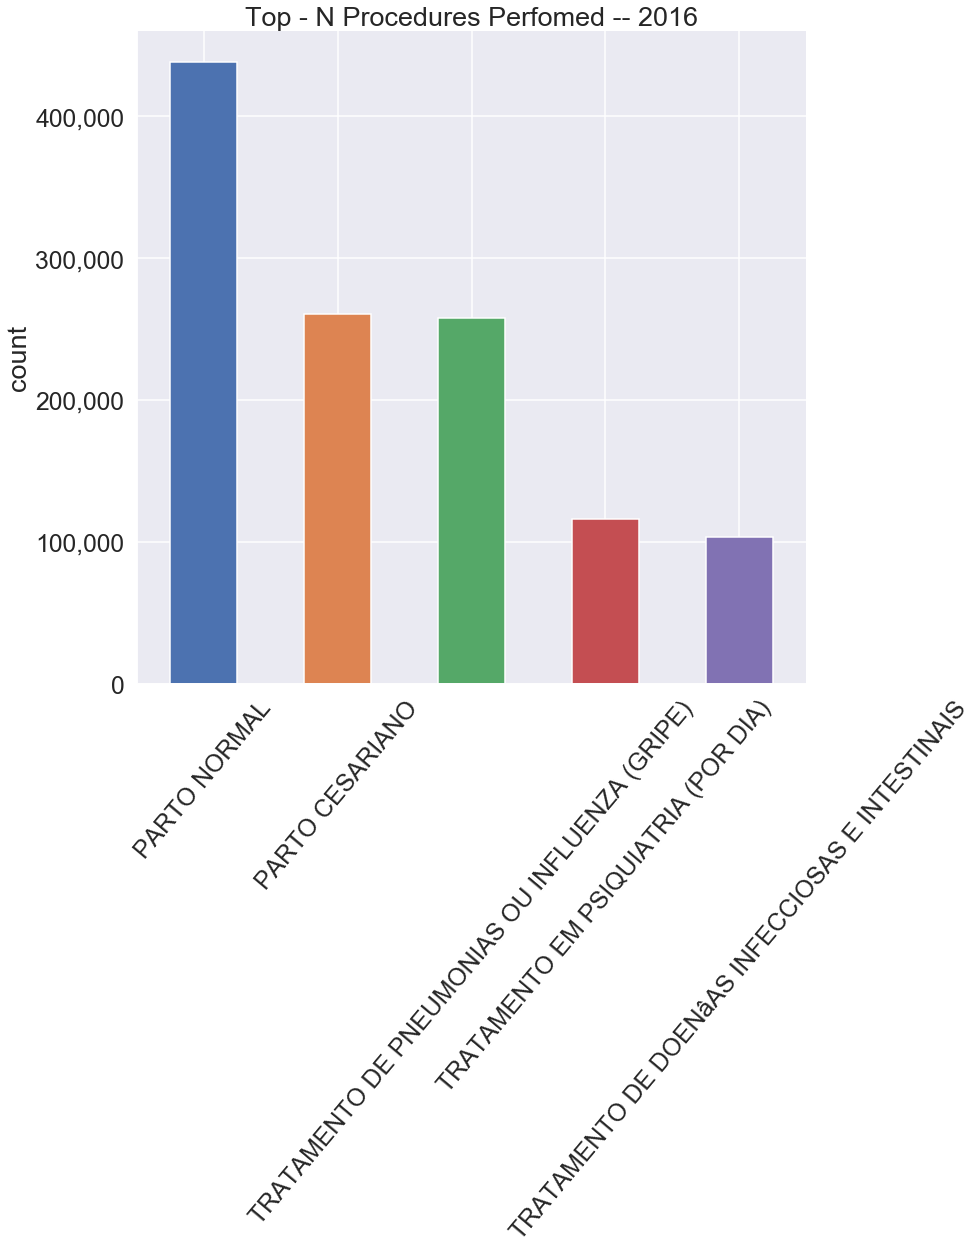

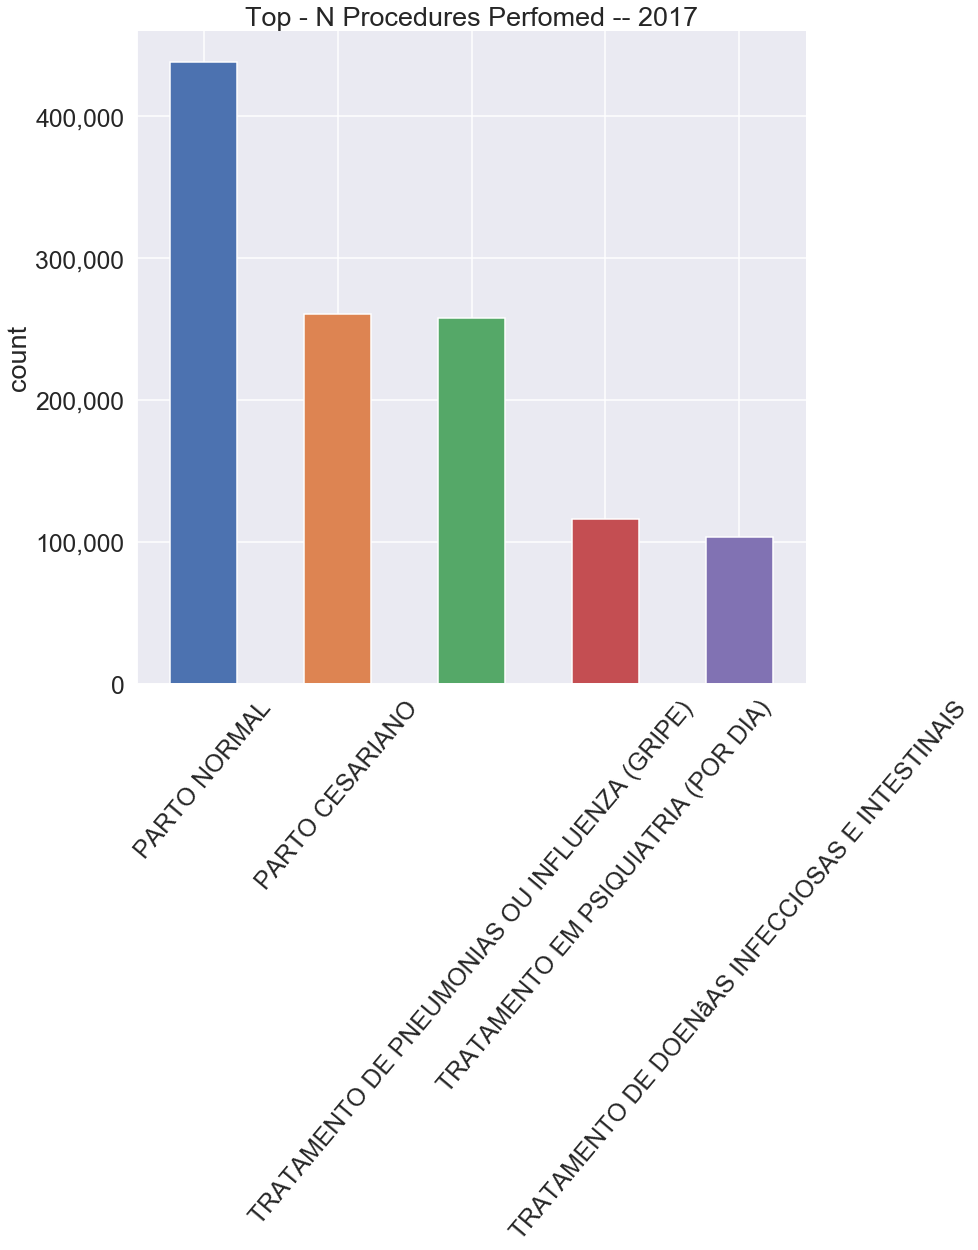

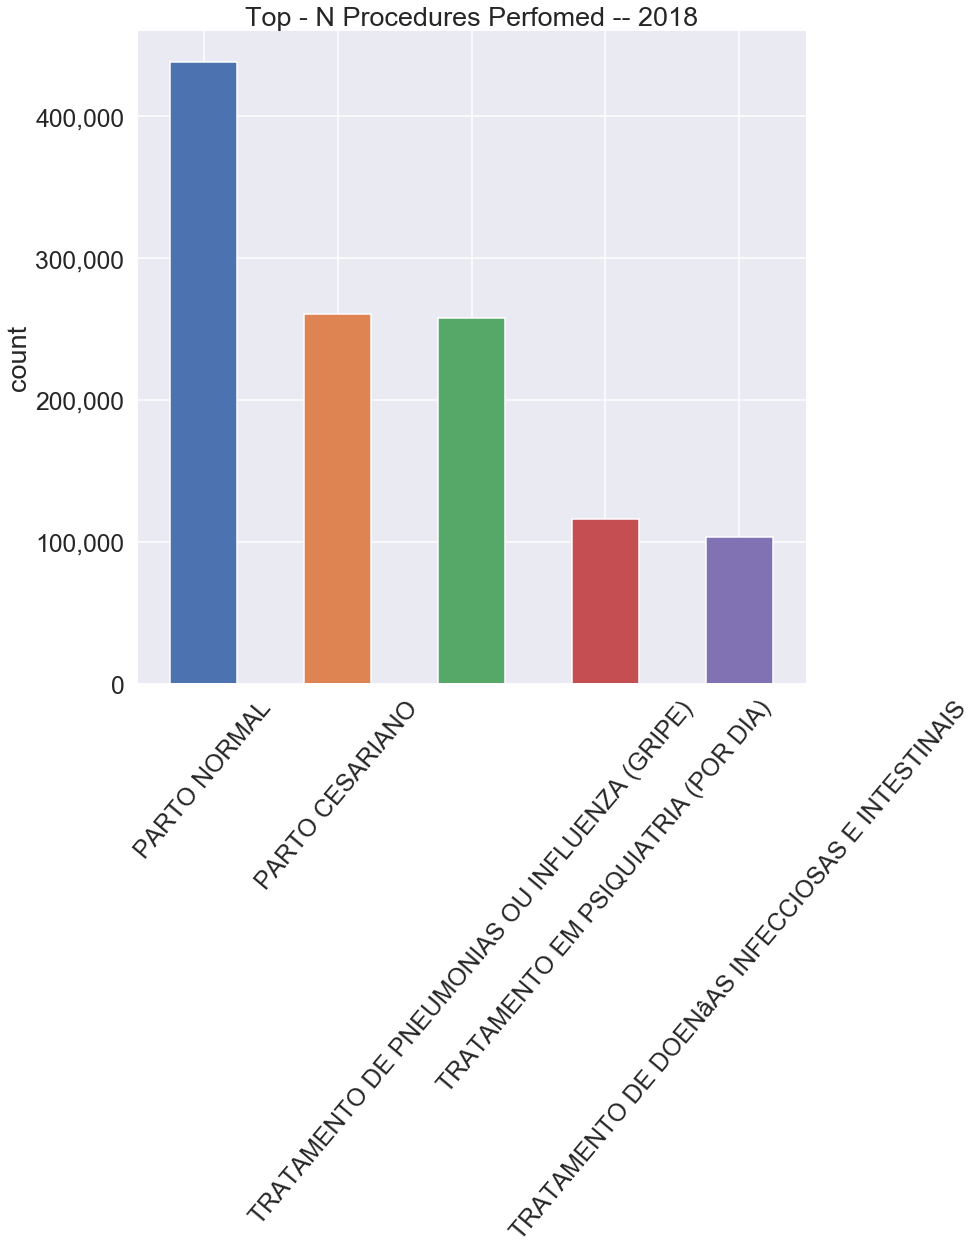

In [67]:
# Top procedures performed by year

count_plot_slice(df = hospi_2015, col_name = 'proc_name', head = 5, 
                 title = 'Top - N Procedures Perfomed -- 2015', xlabel = '', ylabel = 'count')

count_plot_slice(df = hospi_2015, col_name = 'proc_name', head = 5, 
                 title = 'Top - N Procedures Perfomed -- 2016', xlabel = '', ylabel = 'count')

count_plot_slice(df = hospi_2015, col_name = 'proc_name', head = 5, 
                 title = 'Top - N Procedures Perfomed -- 2017', xlabel = '', ylabel = 'count')

count_plot_slice(df = hospi_2015, col_name = 'proc_name', head = 5, 
                 title = 'Top - N Procedures Perfomed -- 2018', xlabel = '', ylabel = 'count')

In [68]:
# Create counts of principal diagnosis and plot distribution

proc_count = pd.DataFrame(hospi_data_clean.proc_name.value_counts()).reset_index()

proc_count_2015 = pd.DataFrame(hospi_data_clean.proc_name.value_counts()).reset_index()

proc_count_2016 = pd.DataFrame(hospi_data_clean.proc_name.value_counts()).reset_index()

proc_count_2017 = pd.DataFrame(hospi_data_clean.proc_name.value_counts()).reset_index()

proc_count_2018 = pd.DataFrame(hospi_data_clean.proc_name.value_counts()).reset_index()

In [69]:
print('Total Unique Categories of Diagnoses:',len(proc_count))

Total Unique Categories of Diagnoses: 1742


There are 1,829 unique procedure categories in the dataset. The most common  procedures performed are normal birth, cesarian birth, treatment for pnemunia, treatment for bacterial diseases, treatment for psychiatric disorders. While these represent a large number of cases they are still a fraction of the total 16M cases.

It is worth noting that there are categories in which cases are very rare. As such this is somewhat of an unbalanced distribution. See tail of categories below.

In [70]:
proc_count.tail(10)

index  proc_name
1732               RECONSTRUCAO OSTEOPLASTICA DO JOELHO          1
1733  TRANSECâêES SUB-PIAIS MULTIPLAS EM AREAS ELOQU...          1
1734  LIGADURA DE FISTULA SISTEMICO-PULMONAR (CRIANâ...          1
1735            NUCLEOTRACTOMIA TRIGEMINAL E/OU ESPINAL          1
1736                             ANASTOMOSE LINFOVENOSA          1
1737                  TRATAMENTO DE CONTUSAO MIOCARDICA          1
1738        REIMPLANTE DO TERCO MEDIO DA PERNA ATE O PE          1
1739         TRANSPLANTE DE PERIOSTEO EM ESCLEROMALACIA          1
1740  TRATAMENTO CIR˜RGICO DE DEFORMIDADE DA COLUNA ...          1
1741  REIMPLANTE AO NIVEL DA COXA ATE O TERCO PROXIM...          1

Text(0.5,0,'Log of Count')

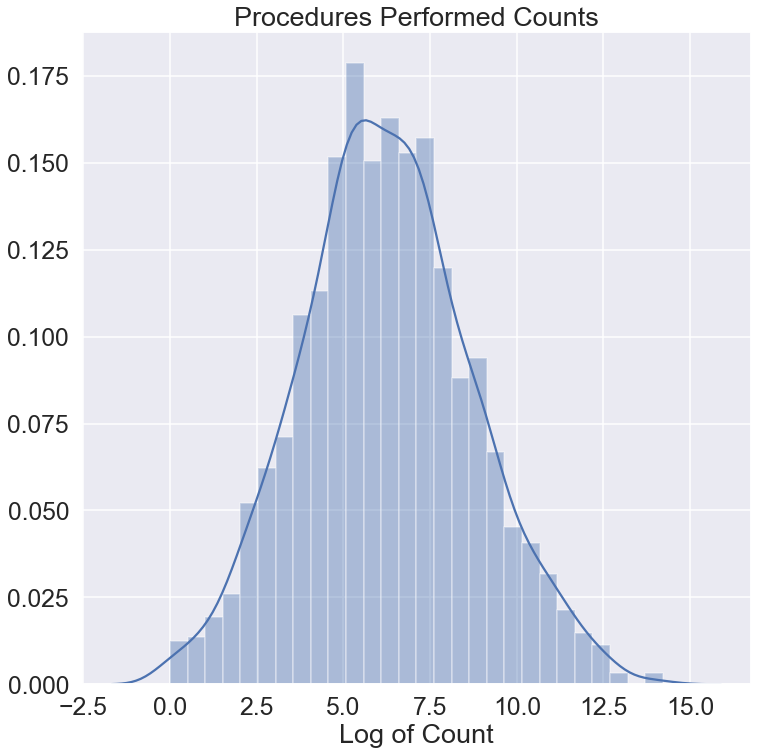

In [71]:
# Plot prcedures count variable - - All Years/Total

sns.distplot(np.log(proc_count['proc_name']))

plt.title("Procedures Performed Counts")

plt.xlabel('Log of Count')

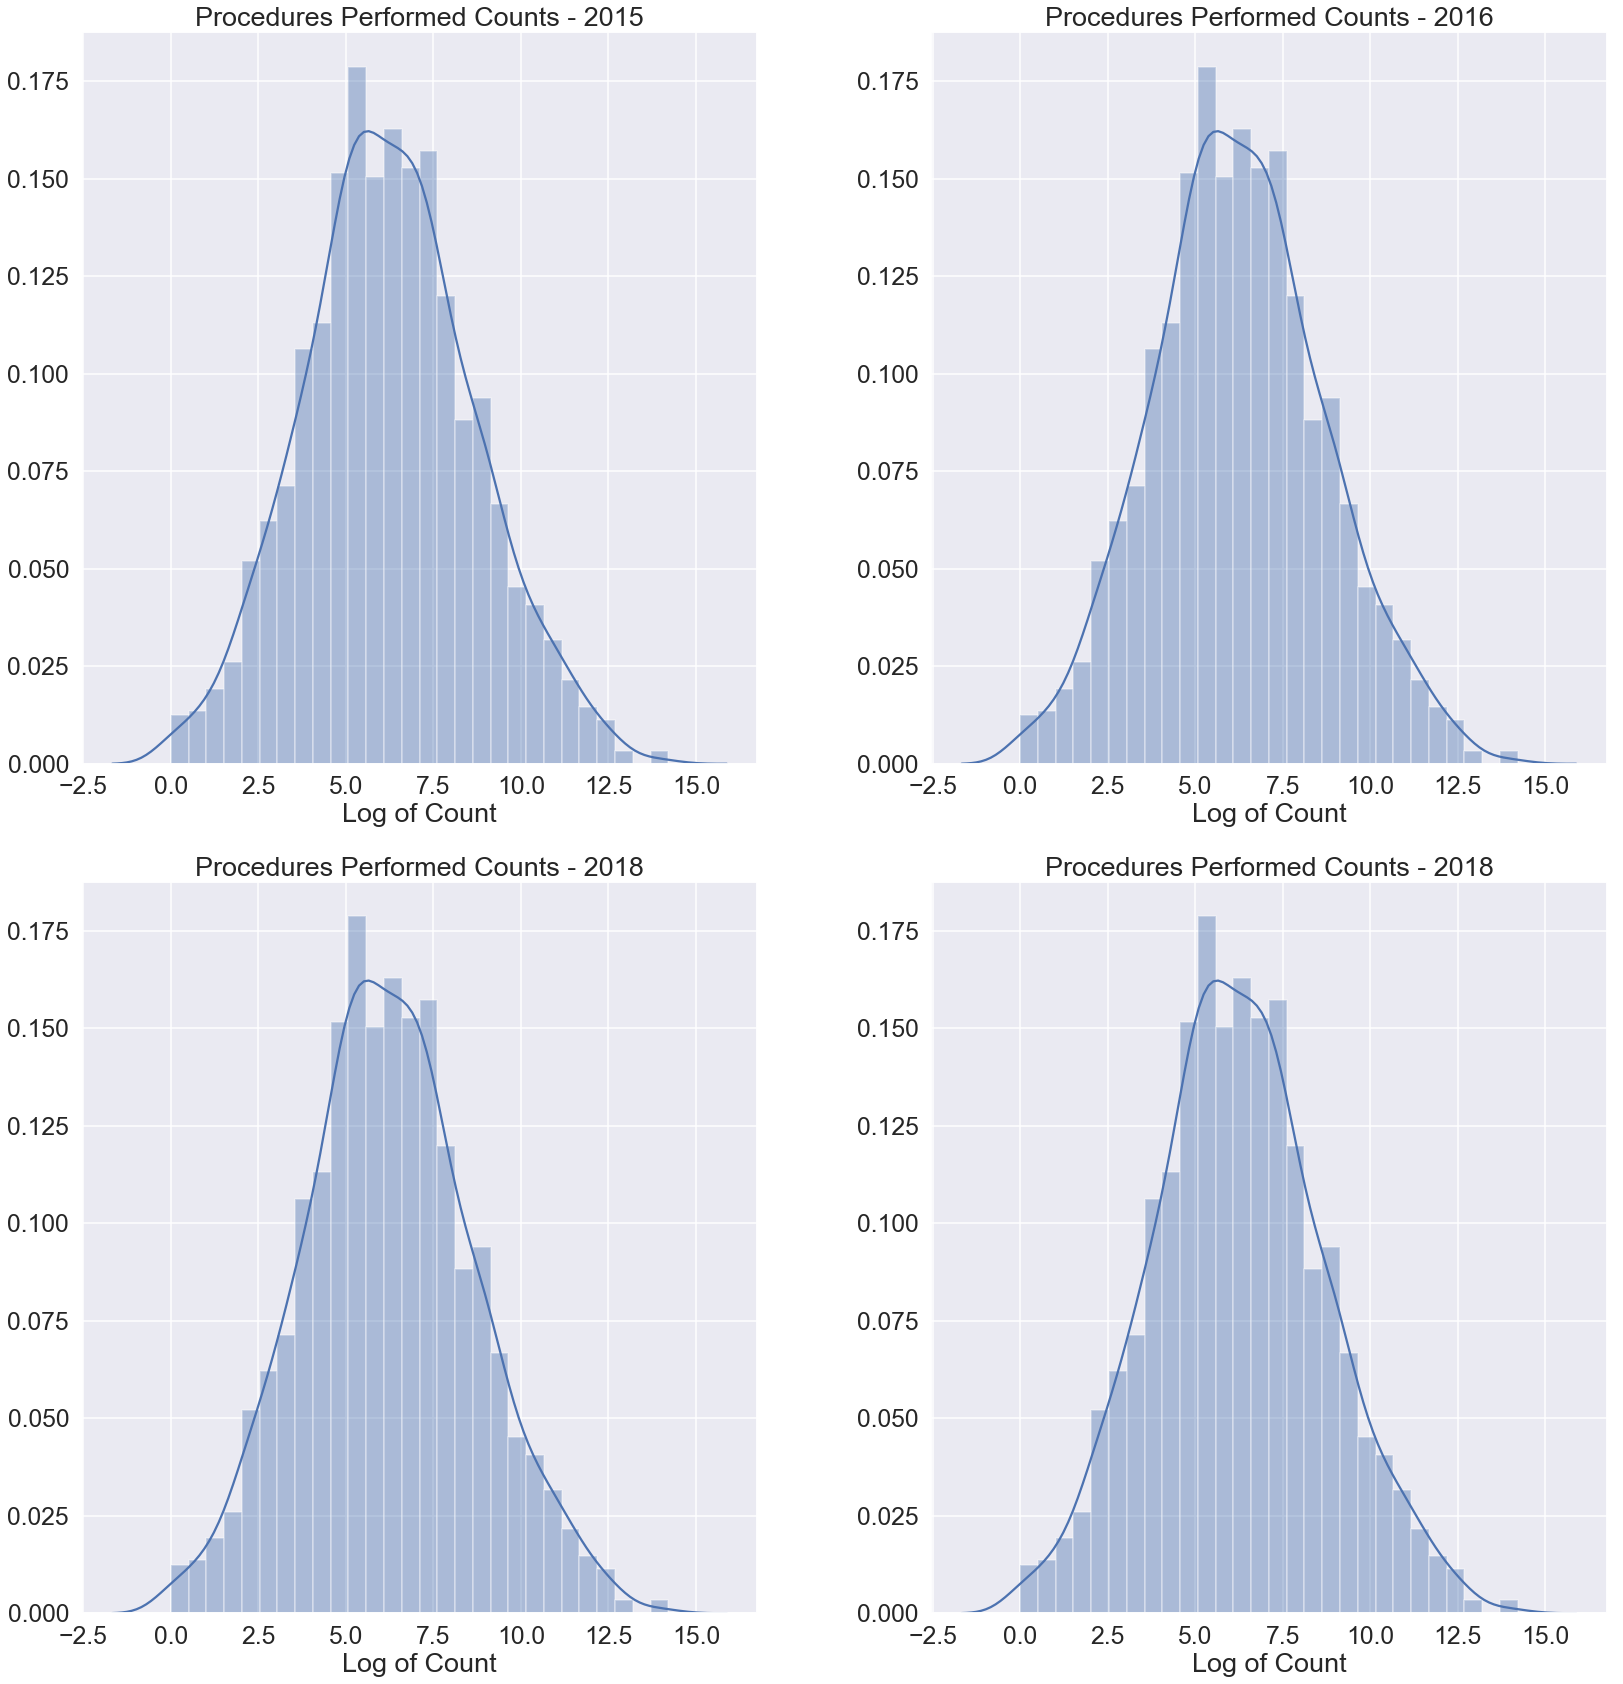

In [72]:
#Plot histograms for each year

plt.subplot(221)

sns.distplot(np.log(proc_count_2015['proc_name']))

plt.title("Procedures Performed Counts - 2015")

plt.xlabel('Log of Count')

plt.subplot(222)

sns.distplot(np.log(proc_count_2016['proc_name']))

plt.title("Procedures Performed Counts - 2016")

plt.xlabel('Log of Count')

plt.subplot(223)

sns.distplot(np.log(proc_count_2017['proc_name']))

plt.title("Procedures Performed Counts - 2018")

plt.xlabel('Log of Count')

plt.subplot(224)

sns.distplot(np.log(proc_count_2018['proc_name']))

plt.title("Procedures Performed Counts - 2018")

plt.xlabel('Log of Count')

plt.tight_layout(rect=[2, 2, 4, 4])

** Normal Distribution Tests of the Diagnosis Categories Counts**

**D’Agostino and Pearson’s Normality Test**

*From the documentation: This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s, test that combines skew and kurtosis to produce an omnibus test of normality.*

**Anderson-Darling Normality Test:** This test has been shown to have more statistical power for testing normality.

*From the documentation: The Anderson-Darling tests the null hypothesis that a sample is drawn from a population that follows a particular distribution. For the Anderson-Darling test, the critical values depend on which distribution is being tested against. This function works for normal, exponential, logistic, or Gumbel (Extreme Value Type I) distributions.

> H0: Distribution is normal.

> H1: Distribution is not normal.

> alpha = 0.05

In [73]:
# Normality Tests

norm_dist_tests(df = proc_count, col_name = 'proc_name')

D’Agostino and Pearson’s:  NormaltestResult(statistic=3591.569150252355, pvalue=0.0)
Anderson-Darling:  AndersonResult(statistic=510.63637388901225, critical_values=array([0.575, 0.655, 0.785, 0.916, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Distribution Statistics:  DescribeResult(nobs=1742, minmax=(1, 1485392), mean=9537.789896670494, variance=3100616583.622689, skewness=16.78001623171556, kurtosis=366.7628859790423)


The normality and distribution tests suggest that the counts of the procedure categories variable are not normally distributed.

In [74]:
# ECDF

x, y = ecdf(proc_count['proc_name'])

x_theor, y_theor = theor_ecdf(df = proc_count, col_name = 'proc_name', seed = 42)

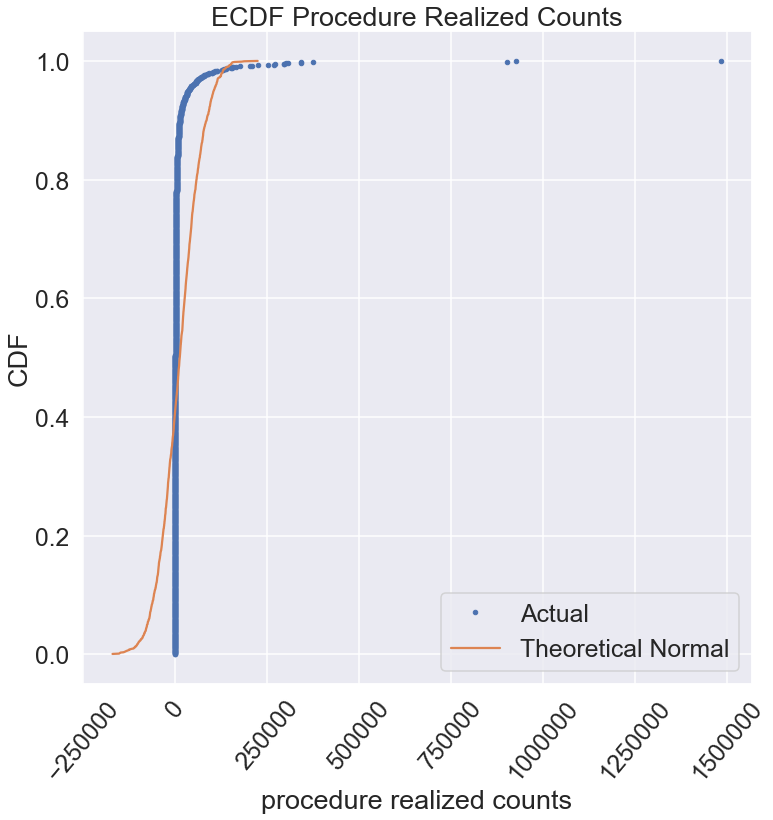

In [75]:
#Graph actual cumulative sample distribution

plt.plot(x, y, marker='.', linestyle='none', label = 'Actual')

plt.plot(x_theor, y_theor, label = 'Theoretical Normal')

plt.legend()

plt.title("ECDF Procedure Realized Counts")

plt.xticks(rotation = 50)

plt.xlabel("procedure realized counts")

plt.ylabel('CDF')

plt.show()

The distribution of procedure realized counts does not follow a theoretical normal distribution at all.

**Hypothesis Testing:** *Bootstrap Replicates*

> H0: Population mean is 9,084 diagnoses per procedure category.

> Ha: Population mean is 9,084 diagnoses per procedure category.

> alpha = 0.05

In [76]:
proc_count_mean = np.mean(proc_count['proc_name'])

proc_count_mean

9537.789896670494

In [77]:
# Replicates

%time

n_tries = 10000

proc_mean_replicates = bs_sample(proc_count['proc_name'], np.mean, size = n_tries)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs


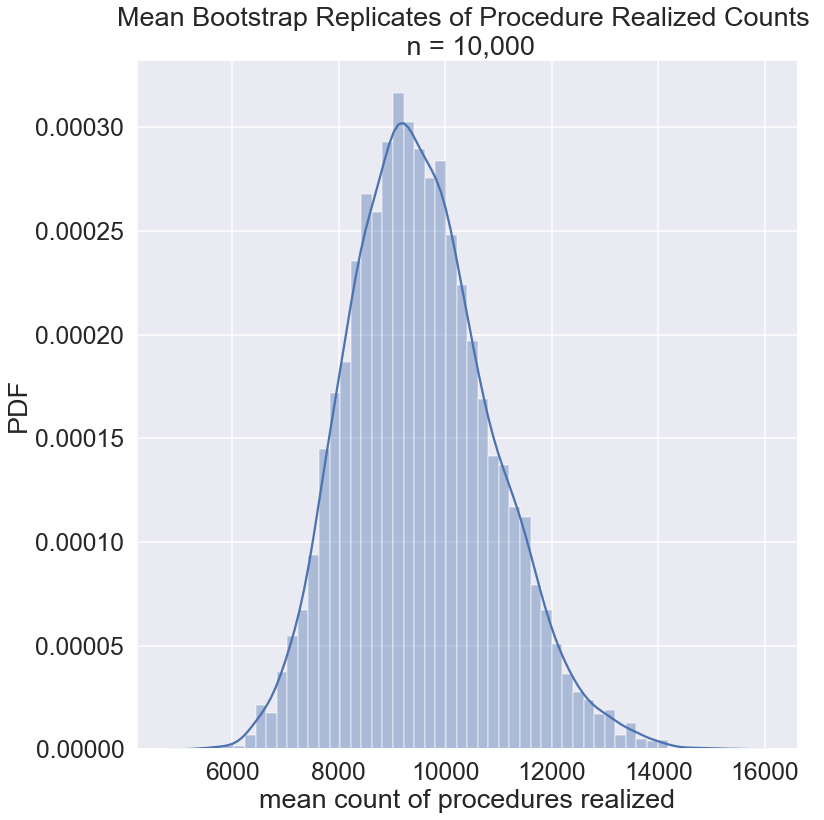

In [78]:
#Create Histogram of Bootstrap Mean Replicates

sns.distplot(proc_mean_replicates, norm_hist=True)

plt.ylabel('PDF')

plt.xlabel('mean count of procedures realized')

plt.title("Mean Bootstrap Replicates of Procedure Realized Counts \n n = 10,000")

plt.tight_layout()

* The bootstrap replicates are normally distributed. 
* The distribution contains the sample mean of 9,084.10

In [79]:
boot_conf_int(ci = [2.5,97.5], mean_rep = proc_mean_replicates, 
              mean = proc_count_mean)

Bootstrap Mean Replicates 95% CI:  [ 7183.50477899 12393.44959816]
P-value of patient age mean replicates:  0.5293


The bootstrap mean replicates shows a 95% confidence interval for diagnosis counts is between 7,183.50 and 12,393. This is a wide interval.This range contains the sample mean of 9,084. The p-value is 0.43 which is above the alpha level of 0.05, this means we cannot reject the hypothesis that the mean cases per category is 9,537.

**Hypothesis Testing:** *One Sample T-Test*

> H0: Population mean is 9,084 diagnoses per category.

> Ha: Population mean is 9,084 diagnoses per category.

> alpha = 0.05

In [80]:
# One-sided t-test

stats.ttest_1samp(proc_count['proc_name'], proc_count_mean)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

The p-value is above the alpha level of 0.05. This suggests that we cannot reject the null hypothesis that the population mean is 9,084 per category.

## *Procedures Performed Group*

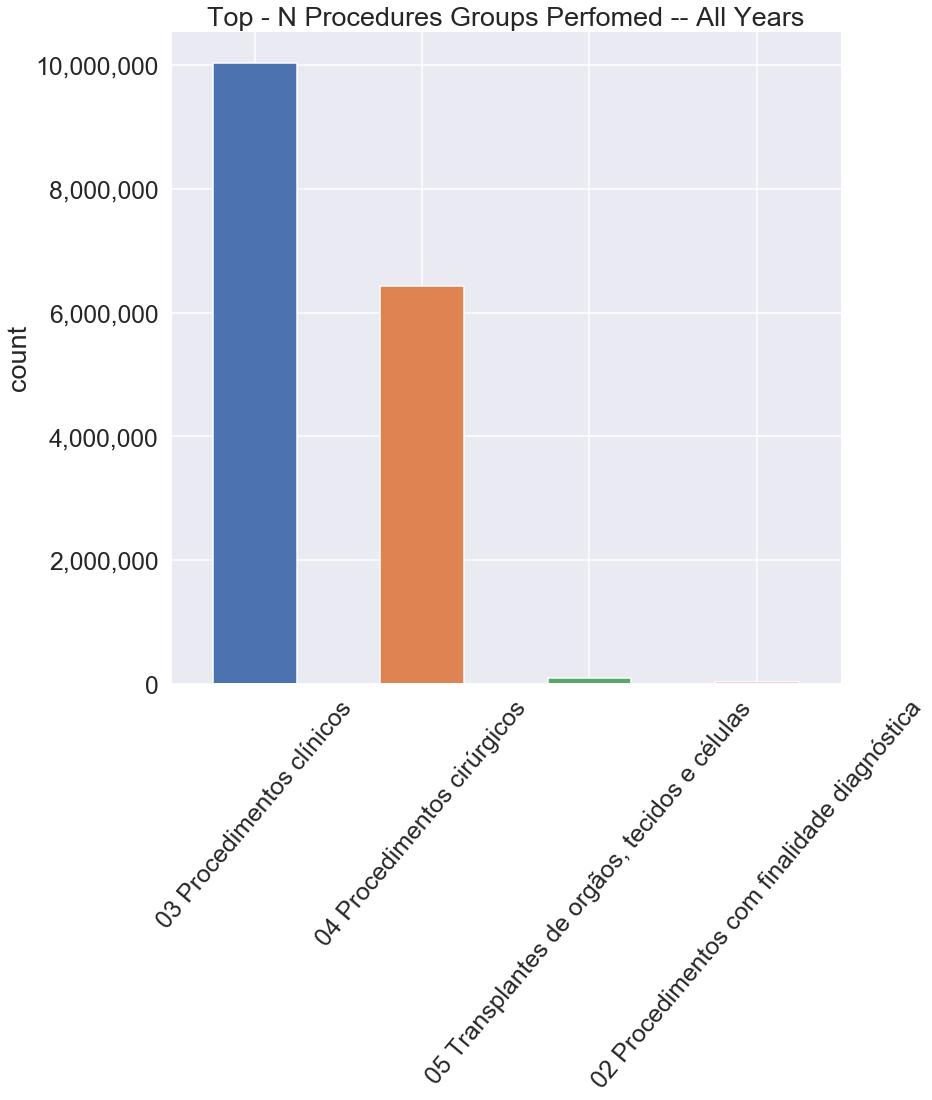

In [81]:
#Top Procedures Performed

count_plot_slice(df = hospi_data_clean, col_name = 'proc_group', head = 5, 
                 title = 'Top - N Procedures Groups Perfomed -- All Years', xlabel = '', ylabel = 'count')

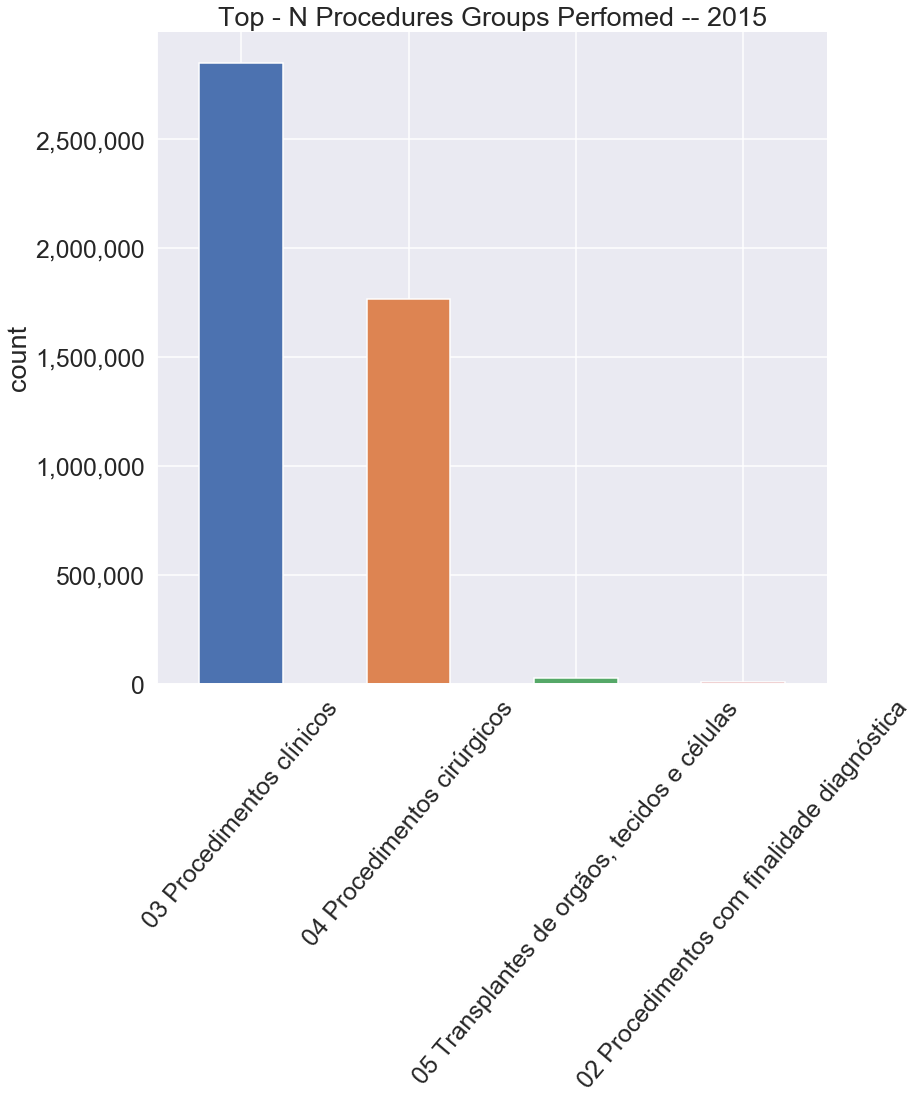

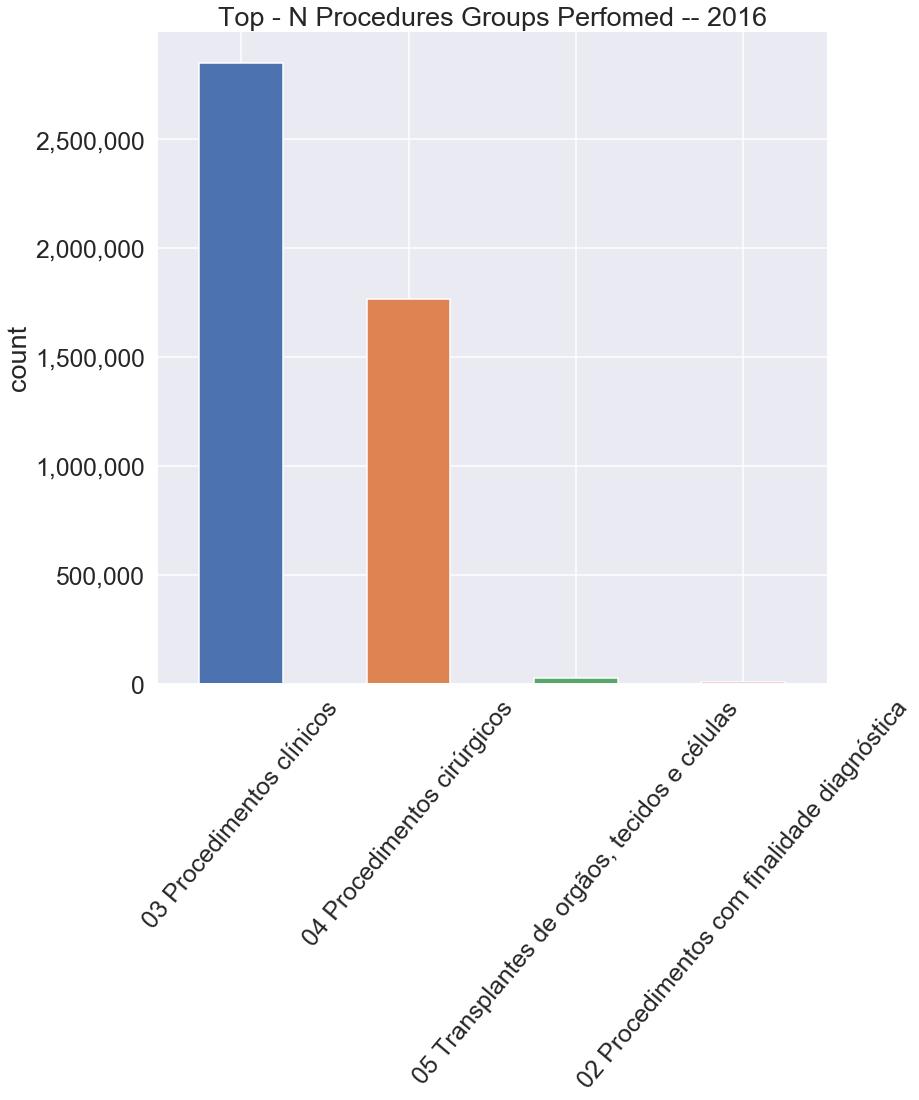

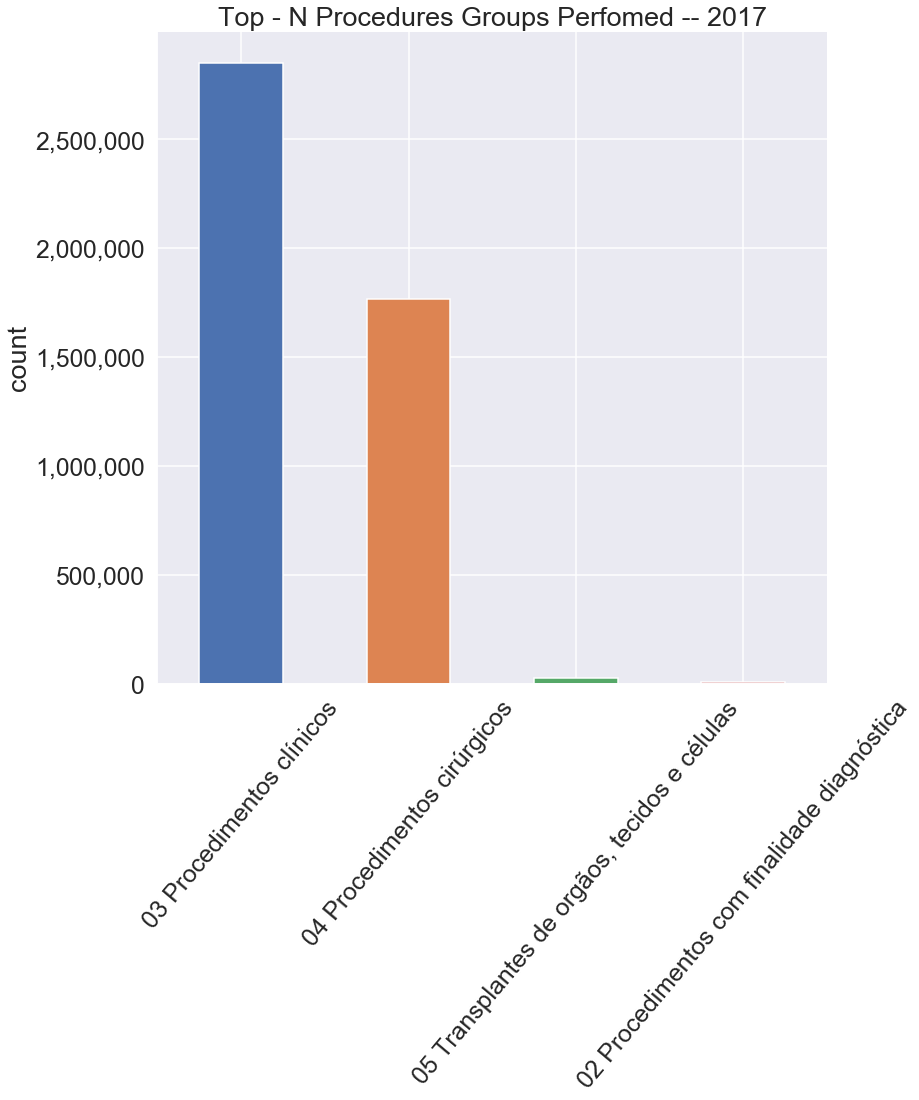

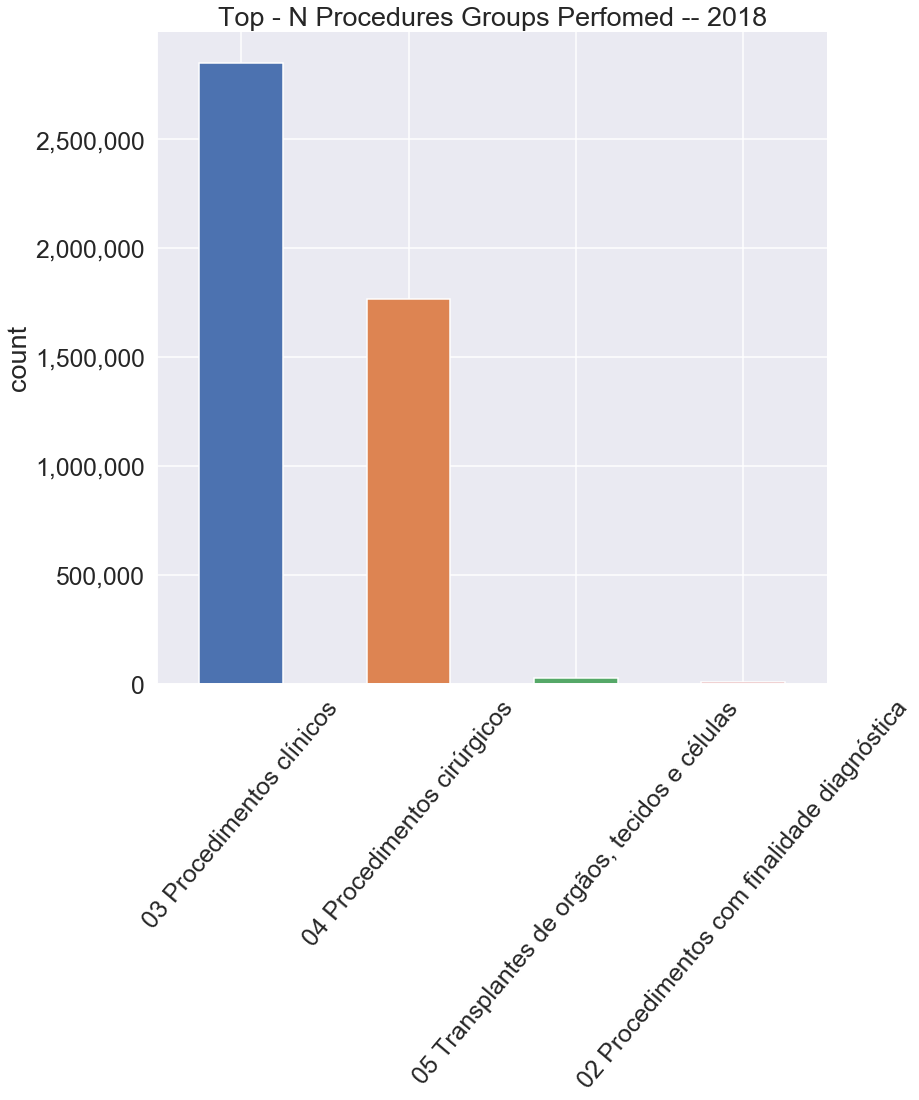

In [82]:
# Top procedures performed by year

count_plot_slice(df = hospi_2015, col_name = 'proc_group', head = 5, 
                 title = 'Top - N Procedures Groups Perfomed -- 2015', xlabel = '', ylabel = 'count')

count_plot_slice(df = hospi_2015, col_name = 'proc_group', head = 5, 
                 title = 'Top - N Procedures Groups Perfomed -- 2016', xlabel = '', ylabel = 'count')

count_plot_slice(df = hospi_2015, col_name = 'proc_group', head = 5, 
                 title = 'Top - N Procedures Groups Perfomed -- 2017', xlabel = '', ylabel = 'count')

count_plot_slice(df = hospi_2015, col_name = 'proc_group', head = 5, 
                 title = 'Top - N Procedures Groups Perfomed -- 2018', xlabel = '', ylabel = 'count')

In [83]:
proc_count = pd.DataFrame(hospi_data_clean.proc_group.value_counts()).reset_index()

proc_count

index  proc_group
0                     03 Procedimentos clínicos    10044212
1                   04 Procedimentos cirúrgicos     6437741
2  05 Transplantes de orgãos, tecidos e células       98722
3   02 Procedimentos com finalidade diagnóstica       34155

Clinical and surgical procedures are by far the most commom type of procedures.

## *Procedures Subgroup*

In [41]:
proc_sub_count = pd.DataFrame(hospi_data_clean.proc_subgroup_name.value_counts()).reset_index()

proc_sub_count

index  proc_subgroup_name
0   0303 Tratamentos clínicos (outras especialidades)             6752990
1                             0310 Parto e nascimento             1636961
2                            0411 Cirurgia obstétrica             1452495
3              0408 Cirurgia do sistema osteomuscular             1068710
4   0407 Cirurgia do aparelho digestivo\t orgãos a...             1045207
5                               0415 Outras cirurgias              732356
6             0409 Cirurgia do aparelho geniturinário              676902
7     0301 Consultas / Atendimentos / Acompanhamentos              524848
8                        0304 Tratamento em oncologia              442079
9              0406 Cirurgia do aparelho circulatório              403030
10                      0305 Tratamento em nefrologia              342469
11  0308 Tratamento de lesões\t envenenamentos e o...              318025
12                         0416 Cirurgia em oncologia              197010
13  0404 Cirurgia das vias aéreas superiores\t da ...              182954
14  0401 Pequenas cirurgias e cirurgias de pele\t ...              141905
15                 0405 Cirurgia do aparelho da visão              139815
16  0403 Cirurgia do sistema nervoso central e per...              118581
17                           0413 Cirurgia reparadora               82275
18                             0412 Cirurgia torácica               80033
19                              0410 Cirurgia de mama               48925
20  0506 Acompanhamento e intercorrências no pré e...               45899
21  0503 Ações relacionadas à doação de orgãos e t...               29975
22  0303 Tratamentos clínicos (outras especialidad...               26840
23                        0505 Transplante de orgãos"               19263
24       0401 Pequenas cirurgias e cirurgias de pele"               18787
25              0402 Cirurgia de glândulas endócrinas               17345
26                              0414 Bucomaxilofacial               17072
27                            0201 Coleta de material               15080
28        0211 Métodos diagnósticos em especialidades                9903
29                    0209 Diagnóstico por endoscopia                9155
30          0404 Cirurgia das vias aéreas superiores"                4983
31  0403 Cirurgia do sistema nervoso central e per...                4527
32    0504 Processamento de tecidos para transplante"                2444
33            0406 Cirurgia do aparelho circulatório"                2350
34                            0412 Cirurgia torácica"                2349
35  0501 Coleta e exames para fins de doação de or...                1141
36                             0410 Cirurgia de mama"                 130
37                           0201 Coleta de material"                  17

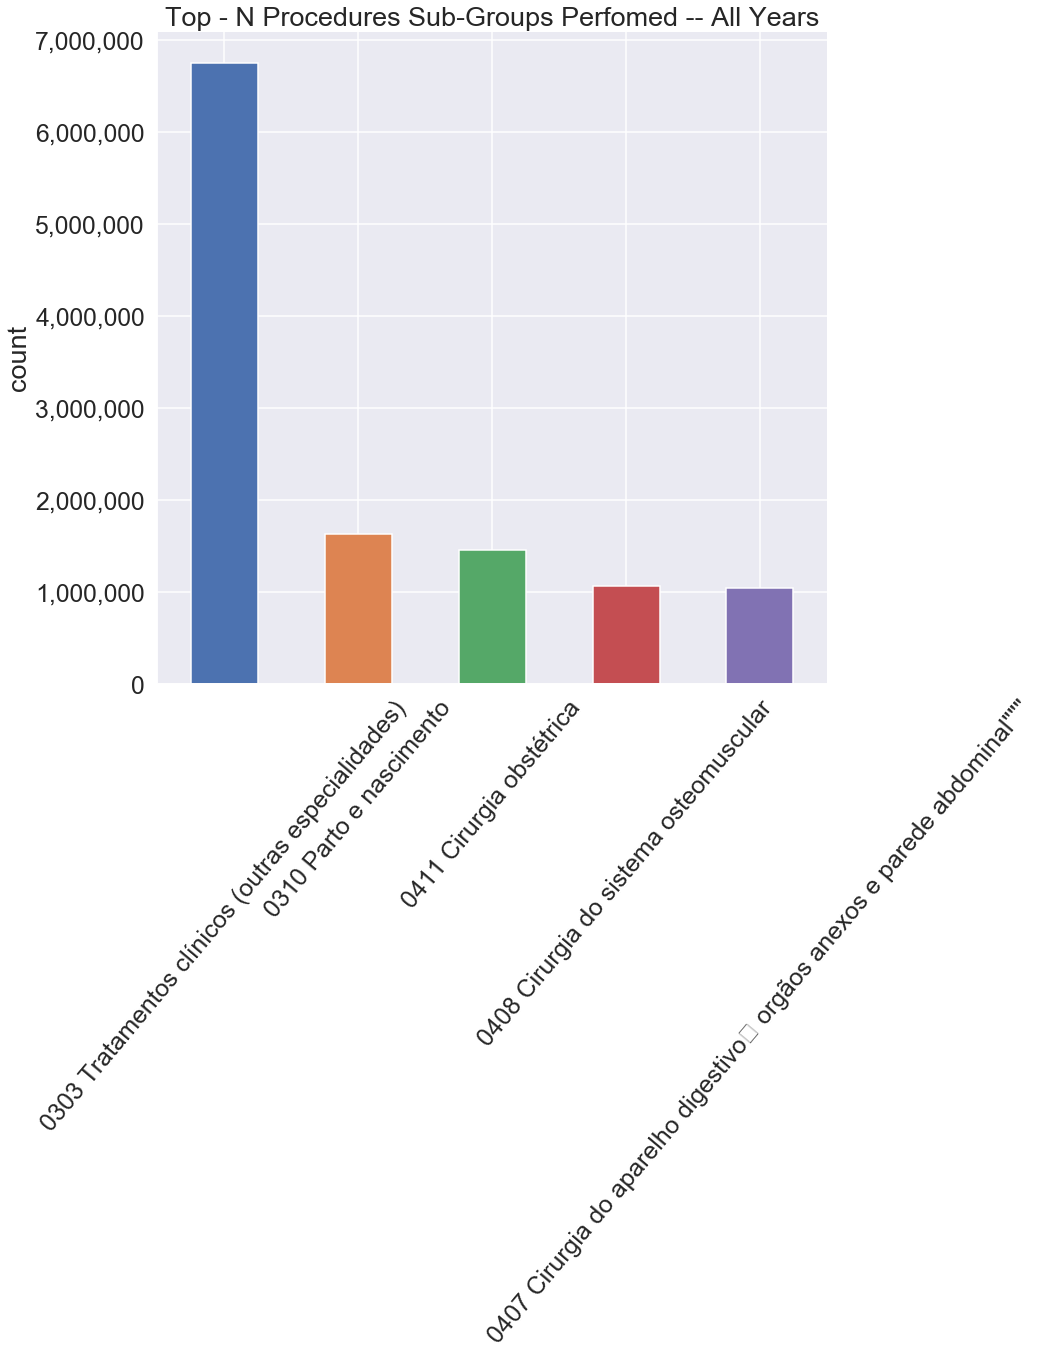

In [42]:
#Top Procedures Performed

count_plot_slice(df = hospi_data_clean, col_name = 'proc_subgroup_name', head = 5, 
                 title = 'Top - N Procedures Sub-Groups Perfomed -- All Years', 
                 xlabel = '', ylabel = 'count')

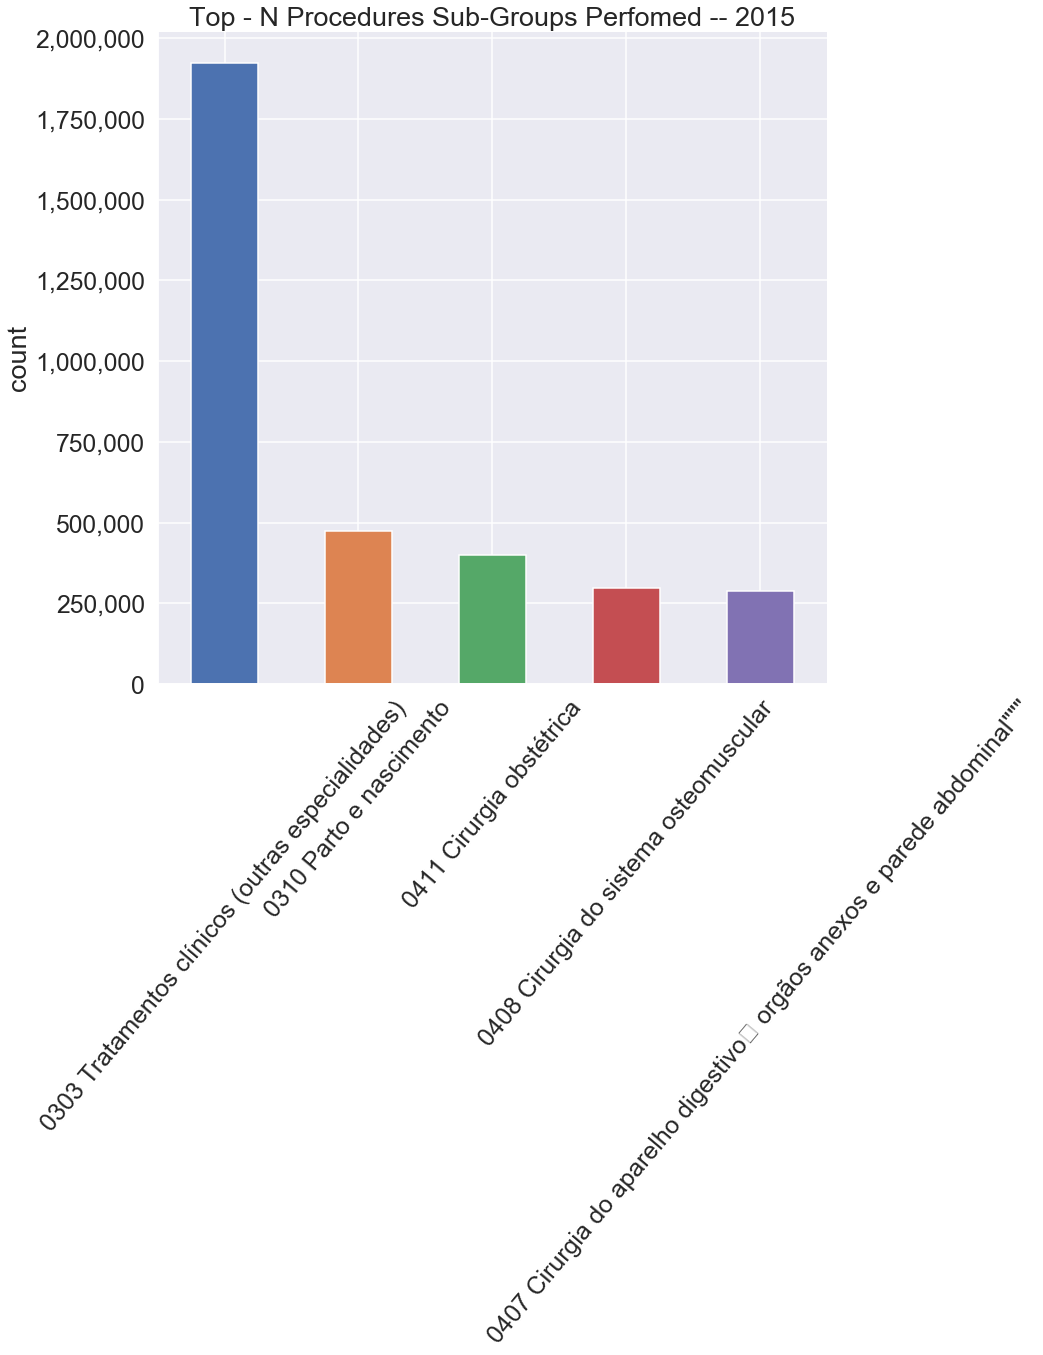

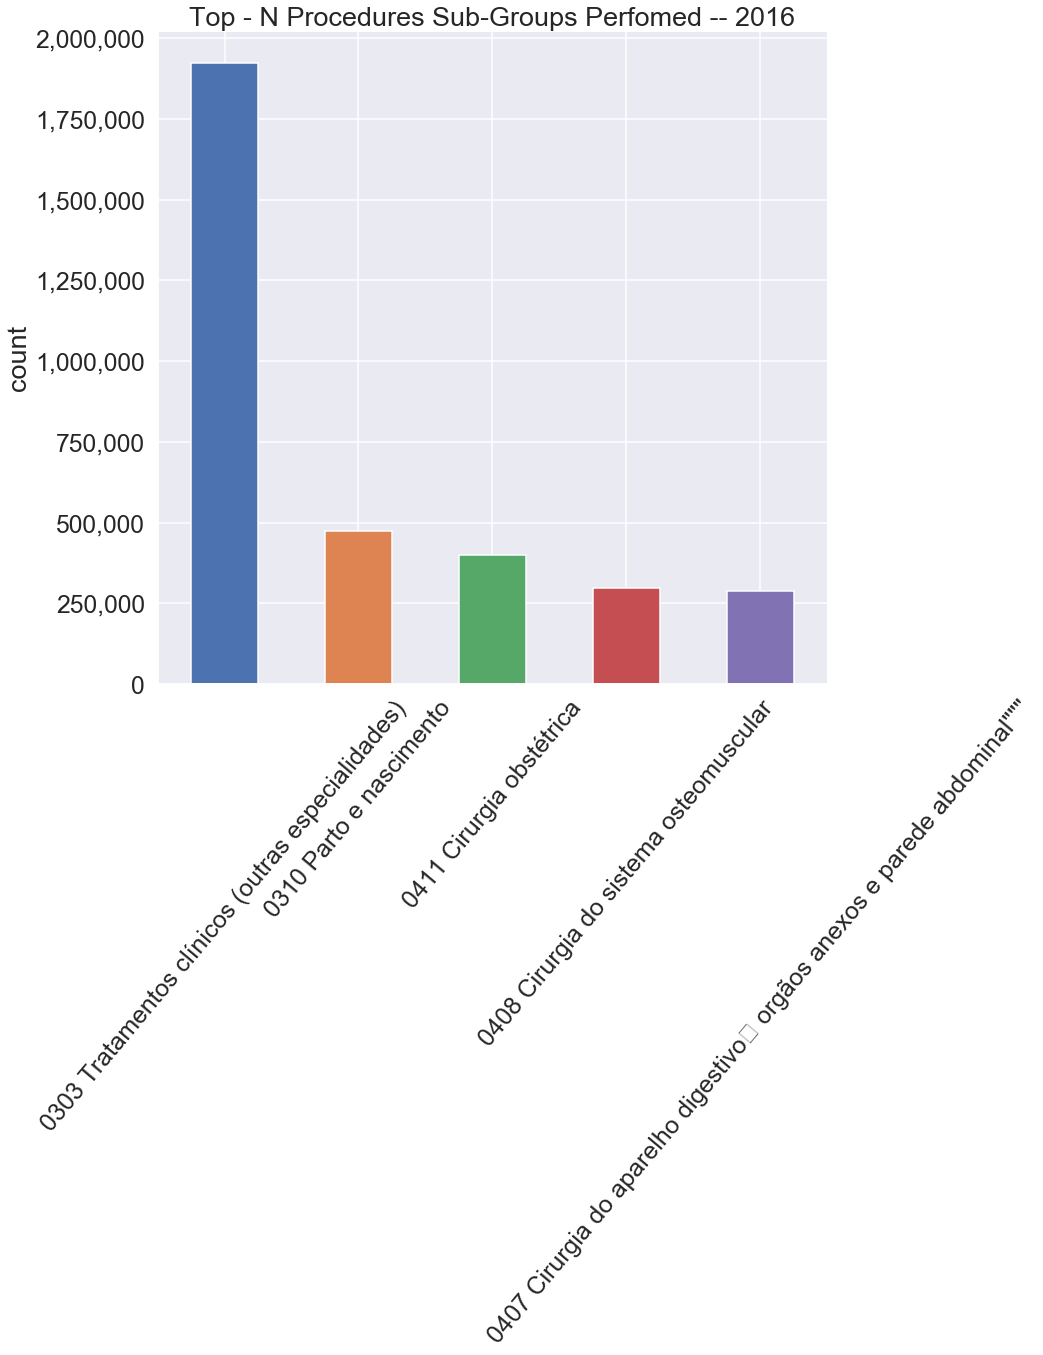

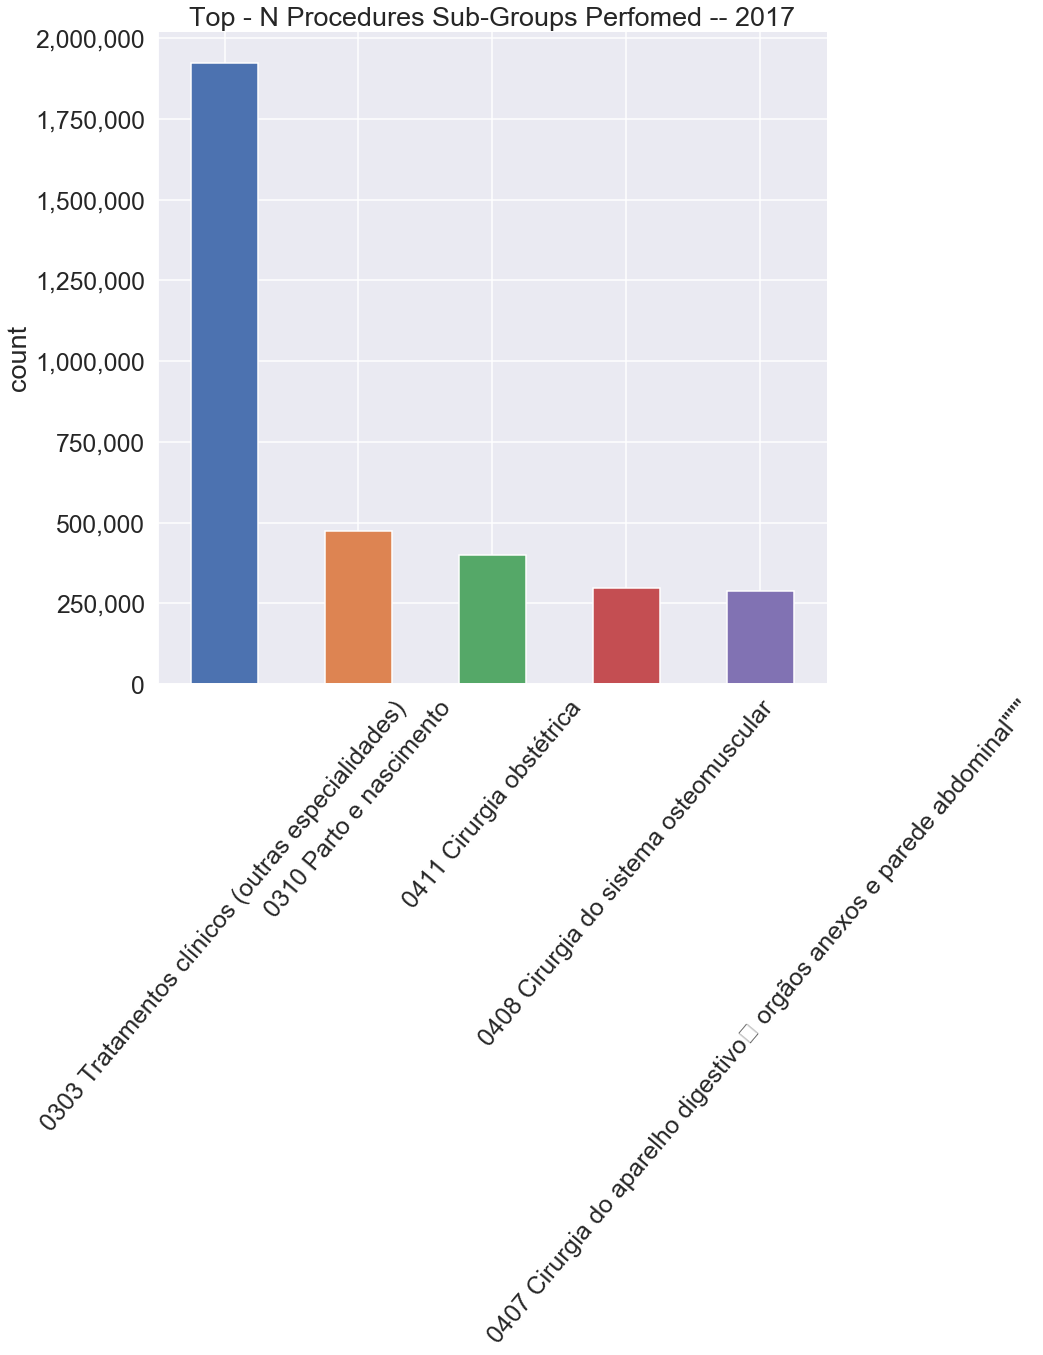

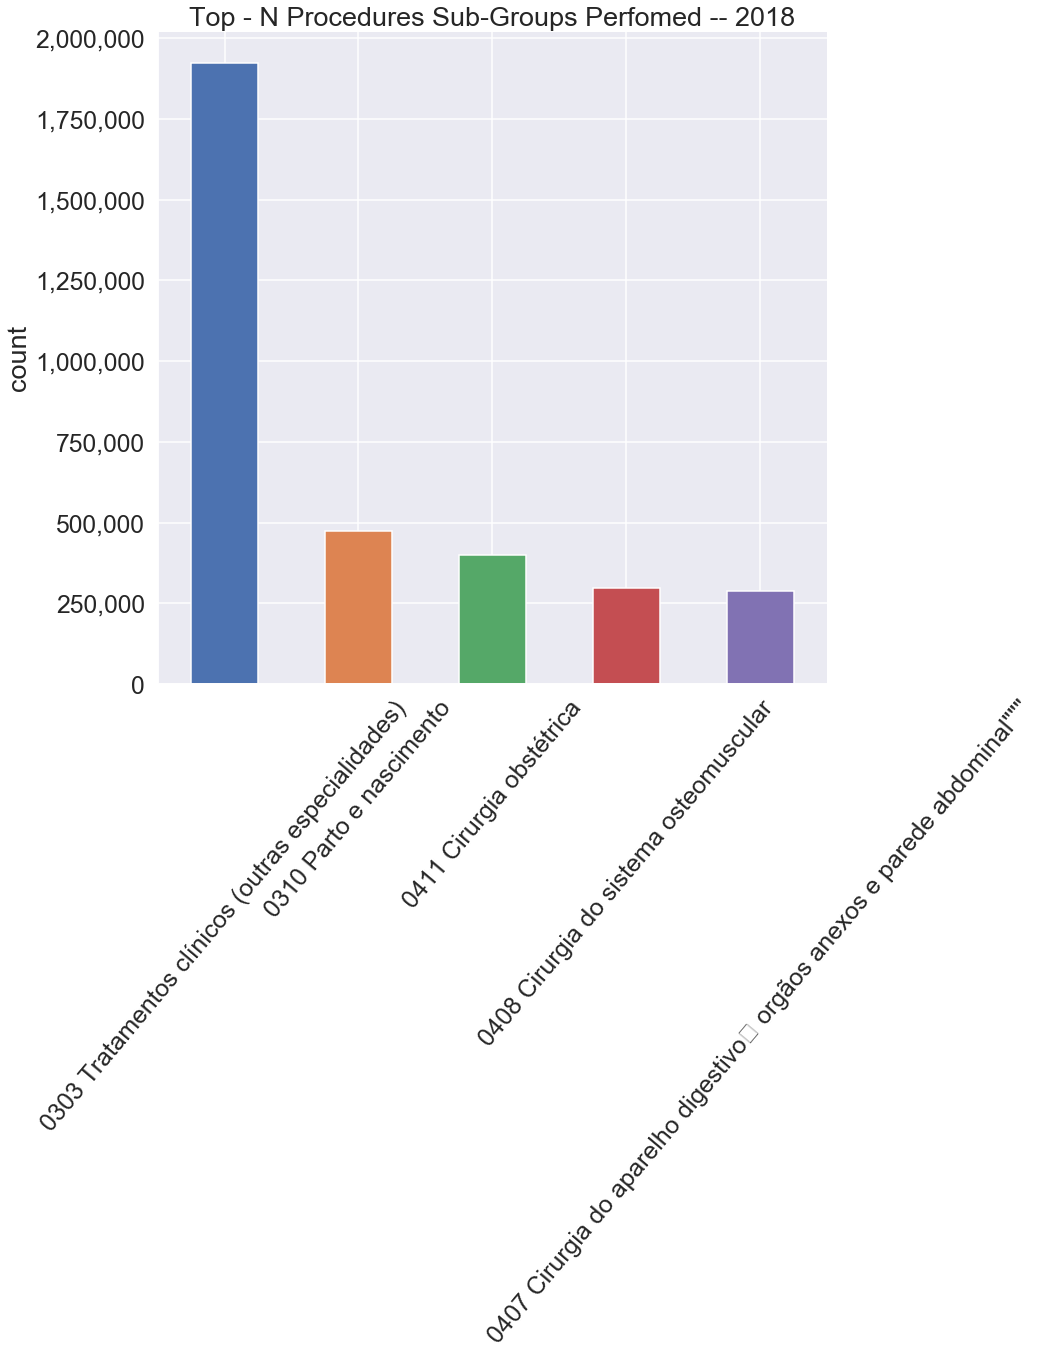

In [44]:
# Top procedures performed by year

count_plot_slice(df = hospi_2015, col_name = 'proc_subgroup_name', head = 5, 
                 title = 'Top - N Procedures Sub-Groups Perfomed -- 2015', xlabel = '', ylabel = 'count')

count_plot_slice(df = hospi_2015, col_name = 'proc_subgroup_name', head = 5, 
                 title = 'Top - N Procedures Sub-Groups Perfomed -- 2016', xlabel = '', ylabel = 'count')

count_plot_slice(df = hospi_2015, col_name = 'proc_subgroup_name', head = 5, 
                 title = 'Top - N Procedures Sub-Groups Perfomed -- 2017', xlabel = '', ylabel = 'count')

count_plot_slice(df = hospi_2015, col_name = 'proc_subgroup_name', head = 5, 
                 title = 'Top - N Procedures Sub-Groups Perfomed -- 2018', xlabel = '', ylabel = 'count')

## Correlations

**Correlations within Hospitalization Data**

In [45]:
hospi_data_corr = hospi_data_clean.corr()

Text(0.5,1,'Heat Map of Hospitalization Characteristics')

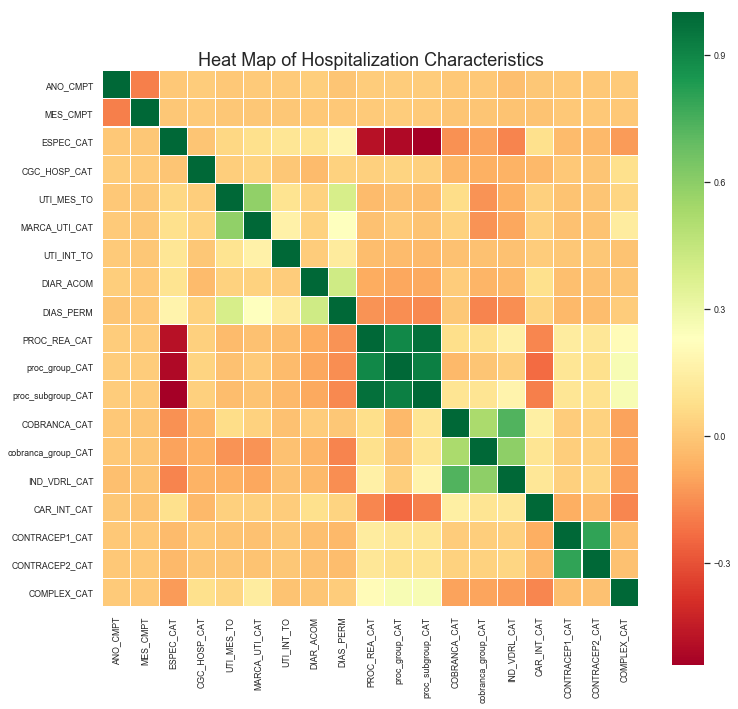

In [46]:
sns.set(font_scale=.8)

sns.heatmap(hospi_data_corr, square=True, linewidths=.05, annot=False, cmap='RdYlGn')

plt.title('Heat Map of Hospitalization Characteristics', fontsize = 18)

+ Especialty of bed is moderately correlated with procedure realized. 
+ The areas in green are variables that are related to each other or were derived from each other. 

**Correlations between Hospitalization Data, Demographics and Diagnosis**

In [47]:
#Load Cleaned Demographics

demo_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 2_Deep_Learning/Data/AIH_sample_demo.csv')

demo = pd.read_csv(demo_path, 
                   encoding = 'UTF-8', 
                   na_values= ['NaN',' ',''])

In [49]:
#Load Cleaned Diagnosis

diag_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 2_Deep_Learning/Data/AIH_sample_diag.csv')

diag = pd.read_csv(diag_path, 
                   encoding = 'UTF-8', 
                   na_values= ['NaN',' ',''])

In [50]:
#Concatenate with Cleaned Hospital Data 

hospi_demo = hospi_data_clean.join(demo, lsuffix='l_', rsuffix='r',  sort = False)

In [51]:
#Concatenate with Cleaned Diagnosis Data 

hospi_diag = hospi_data_clean.join(diag, lsuffix='l_', rsuffix='r',  sort = False)

In [52]:
#Calculate Correlations

hospi_demo_corr = hospi_demo.corr()

hospi_diag_corr = hospi_diag.corr()

Text(0.5,1,'Heat Map of Hospitalization and Demographic Features')

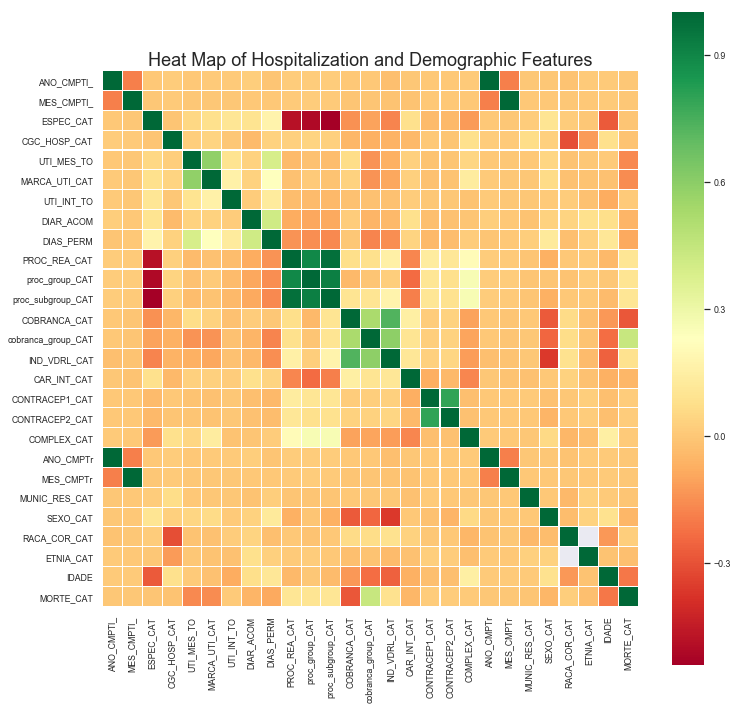

In [53]:
#Plot Demographics and Hospitalization Correlations

sns.set(font_scale=.8)

sns.heatmap(hospi_demo_corr, square=True, linewidths=.05, cmap='RdYlGn')

plt.title('Heat Map of Hospitalization and Demographic Features', fontsize = 18)

+ Weak correlation between sex and reasons for exit/stay. 
+ Weak correlation between age and reasons for exit/stay. 
+ Weak correlation between death indicator and reasons for exit/stay. 
+ Moderate correlation between venereal exam and reasons for stay/exit.

Text(0.5,1,'Heat Map of Hospitalization and Diagnosis Features')

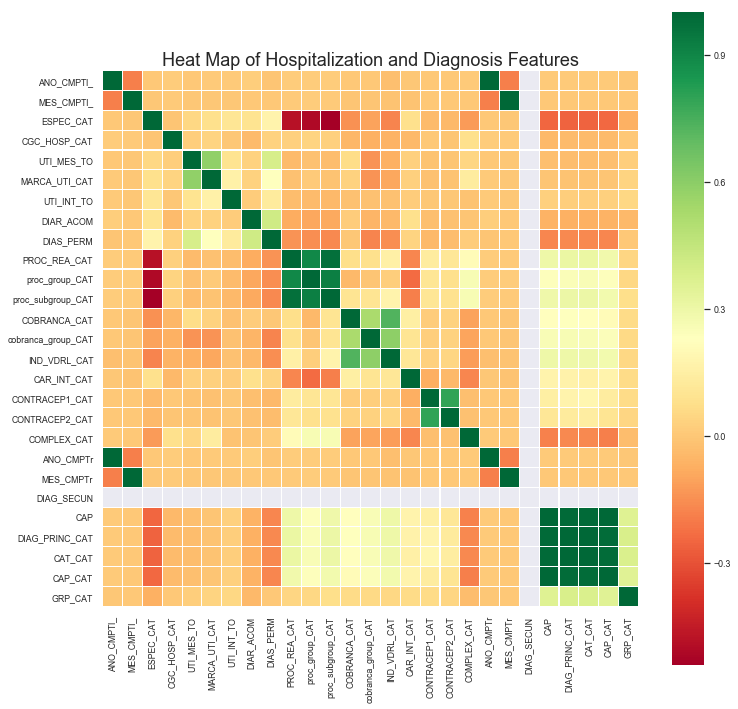

In [54]:
#Plot Diagnosis and Hospitalization Correlations

sns.set(font_scale=.8)

sns.heatmap(hospi_diag_corr, square=True, linewidths=.05, cmap='RdYlGn')

plt.title('Heat Map of Hospitalization and Diagnosis Features', fontsize = 18)

+ Weak correlation between diagnosis and: procedure performed, reasons for stay/exit and, character of hospitalization.

## Export Cleaned Diagnosis Data

**The numerical categorical values are the ones that will be used in the model.**

In [55]:
hospi_data_clean.to_csv('AIH_sample_hospi.csv', index = False, 
                        na_rep= 'NaN', encoding='utf-8', chunksize = 50000)